#**Ciencia de Datos Aplicada MINE-4101 - TALLER 3**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/University_of_Los_Andes_logo.svg/1200px-University_of_Los_Andes_logo.svg.png" style="width:50px;"> 

Univerisdad de los Andes  
Realizado por: 

  Oscar Fernando Bosigas Puerto – 202220008 - o.bosigas

  Yeimy Andrea Cano M – 202213304 - y.cano

  David Polania Mejia - 202213328 - d.polaniam

# **0. Importación de librerias de trabajo**

Primero se procede a hacer la importación de librerías para poder trabajar con los datos y poder realizar el análisis.

In [101]:
#!pip install --upgrade pandas-profiling

In [102]:
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures , OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110    
import pylev

pd.options.display.max_columns=50

# 1. Entendimiento del Negocio




Una empresa del sector farmacéutico desea utilizar la información que posee de sus empleados para estimar el nivel de satisfacción laboral que puedan tener en algún momento y usarlo como insumo para detectar posibles fugas de personal. 

El CEO de la farmacéutica le ha pedido a su equipo de científicos de datos que construyan un modelo para tal fin y le proporcionen un conjunto de estrategias que permitan aumentar el nivel de satisfacción laboral de sus empleados y evitar futuras fugas de personal.


## a.  Situación actual.

Una empresa del sector farmacéutico desea utilizar la información que posee de sus 
empleados para estimar el nivel de satisfacción laboral que puedan tener en algún 
momento y usarlo como insumo para detectar posibles fugas de personal. 

## b. Objetivos del negocio

### i. Objetivo general

- Generar un modelo que permita detectar posibles fugas de personal a partir de los datos de satifacción laboral.

### ii. Objetivos específicos

- Estimar el nivel de satisfacción laboral de los empleados.
- Detectar posibles fugas de personal.
- Proporcionar estrategias para aumentar el nivel de satisfacción laboral de los empleados evitar futuras fugas de personal. 

## c. Plan de trabajo

1. Entendimiento de los datos
1. Preparación de los datos
1. Modelamiento
1. Evaluación de los resultados
1. Presentación de los resultados    


# 1. Entendimiento de los datos

## a. Descripción de los datos

### i. Dicccionario de datos

A continuación el diccionario de datos entregado por el negocio:

|Modelo|Description|
|---|---|
|Age| Age of the employee|
|Attrition| employee attrition|
|BusinessTravel| how frequently an employee travels for business purpose|
|DailyRate| Daily wage of an employee|
|Department| Employee department|
|DistanceFromHome| Distance from home to office in KM's|
|Education| Qualification of employee (masked, higher is better)|
|EducationField| Stream of Education|
|EmployeeCount| EmployeeCount|
|EmployeeNumber| employee number|
|EnvironmentSatisfaction| Environment (higher is better)|
|Gender| Gender of employee|
|HourlyRate| employee hourly rate|
|JobInvolvement| Job involvement (higher is better)|
|JobLevel| level of Job (higher is more important)|
|JobRole| job role of an employee|
|JobSatisfaction| if employee is satisfied?|
|MaritalStatus| employee is married or not|
|MonthlyIncome| income of an employee|
|MonthlyRate| monthly rate of an employee|
|NumCompaniesWorked| number of companies worked for|
|Over18| age over 18|
|OverTime| employee works over time|
|PercentSalaryHike| salary hike|
|PerformanceRating| performance rate|
|RelationshipSatisfaction| Relationship satisfaction|
|StandardHours| per week standard work hours|
|StockOptionLevel| company stock option level|
|TotalWorkingYears| total working years|
|TrainingTimesLastYears| Training time|
|WorkLifeBalance| Work life balance|
|YearsAtCompany| total years at current company|
|YearsInCurrentRole| total years in current role|
|YearsSinceLastPromotion| years since last promotion|
|YearsWithCurrManager| Years worked under current manager|

De acuero a la descripción de las columnas, la variable objetivo es *'JobSatisfaction'*

In [103]:
# Loading data
url = 'https://raw.githubusercontent.com/davidpolme/Taller3-DataScience/main/Data_Taller_3.csv'
data = pd.read_csv(url, sep=';', decimal=",")
data.head(10)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Fem,94,3,2,Sales Executive,Single,5993,19479,8,Y,Yes,11,3,1,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,Married,5130,24907,1,Y,No,23,4,4,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,Single,2090,2396,6,Y,Yes,15,3,2,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Fem,56,3,1,Research Scientist,Married,2909,23159,1,Y,Yes,11,3,3,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,Married,3468,16632,9,Y,No,12,3,4,80.0,1,6,3,3,2,2,2,2,0
5,4.0,32.0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,Single,3068,11864,0,Y,No,13,3,3,80.0,0,8,2,2,7,7,3,6,0
6,1.0,59.0,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,3,Fem,81,4,1,Laboratory Technician,Married,2670,9964,4,Y,Yes,20,4,1,80.0,3,12,3,2,1,0,0,0,0
7,3.0,30.0,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,4,Male,67,3,1,Laboratory Technician,Divorced,2693,13335,1,Y,No,22,4,2,80.0,1,1,2,3,1,0,0,0,0
8,3.0,38.0,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,4,Male,44,2,3,Manufacturing Director,Single,9526,8787,0,Y,No,21,4,2,80.0,0,10,2,3,9,7,1,8,0
9,3.0,36.0,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,3,Male,94,3,2,Healthcare Representative,Married,5237,16577,6,Y,No,13,3,2,80.0,2,17,3,2,7,7,7,7,0


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   JobSatisfaction           1494 non-null   float64
 1   Age                       1503 non-null   float64
 2   Attrition                 1505 non-null   object 
 3   BusinessTravel            1506 non-null   object 
 4   DailyRate                 1506 non-null   int64  
 5   Department                1506 non-null   object 
 6   DistanceFromHome          1506 non-null   int64  
 7   Education                 1506 non-null   int64  
 8   EducationField            1506 non-null   object 
 9   EmployeeCount             1506 non-null   int64  
 10  EmployeeNumber            1506 non-null   int64  
 11  EnvironmentSatisfaction   1506 non-null   int64  
 12  Gender                    1506 non-null   object 
 13  HourlyRate                1506 non-null   int64  
 14  JobInvol

In [105]:
## List all data types
data.dtypes

JobSatisfaction             float64
Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel            

In [106]:
data.describe()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
count,1494.000000,1503.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1.506000e+03,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1499.0,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,2.744311,37.086494,803.978752,9.229084,2.915671,1.000664,753.500000,2.729084,66.280212,2.729084,2.055113,1.303036e+04,14244.022576,2.682603,15.191899,3.152722,2.712483,80.0,0.790173,11.220452,2.802789,2.758964,7.041169,4.212483,2.169987,4.112882,0.007968
std,1.099938,10.848391,403.962331,8.135153,1.031172,0.025768,434.889066,1.092854,21.275971,0.717816,1.106437,2.551646e+05,7105.627164,2.484541,3.655746,0.359839,1.080945,0.0,0.850911,7.778530,1.293076,0.705698,6.568092,3.618337,3.196186,3.572208,0.088938
min,1.000000,3.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,2.500000e+01,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,30.000000,465.000000,2.000000,2.000000,1.000000,377.250000,2.000000,48.000000,2.000000,1.000000,2.886000e+03,8041.250000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,3.000000,36.000000,805.000000,7.000000,3.000000,1.000000,753.500000,3.000000,66.000000,3.000000,2.000000,4.877500e+03,14144.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,4.000000,43.000000,1161.000000,14.000000,4.000000,1.000000,1129.750000,4.000000,84.000000,3.000000,3.000000,8.307750e+03,20385.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,4.000000,200.000000,1499.000000,29.000000,7.000000,2.000000,1506.000000,4.000000,190.000000,4.000000,5.000000,9.907000e+06,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,100.000000,18.000000,15.000000,17.000000,1.000000


De una primera observación general de los datos se puede indentificar:
  * Se tienen 36 columnas de datos, y 1506 registros.
  * Se tienen 3 tipos de datos: float64(3), int64(24), object(9).
  * Las siguientes columnas tienen datos incompletos: JobSatisfaction(1494), Age(1503), Attrition(1505), y StandardHours (1499).

## b. Exploración de datos.

Definición de función para crear las gráficas de barras de las variables categóricas.

In [107]:
def plot_bars(data, variable, title, labels=None, orientation='v', order=True, figsize=(10, 5)):
    #histograma para ver la distribución
    if order:
        order = data[variable].value_counts().index
       
    if orientation == 'v':
        plt = sns.countplot(data=data, x=variable, order=order)
        #Show total number of observations for each category
        for p in plt.patches:
            height = p.get_height()
            plt.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.0f}'.format(height),
                    ha="center") 
        # Delete axis labels
        plt.set_ylabel("")
        plt.set_yticklabels("")
        plt.set(xlabel=None)
        if(labels != None):
            plt.set_xticklabels(labels);
    elif orientation == 'h':
        plt = sns.countplot(data=data, y=variable, order=order)
        
        for p in plt.patches:
            width = p.get_width()
            plt.text(width/2,
             p.get_y()+p.get_height()/2. + 0.1,
            '{:1.0f}'.format(width),
            ha="center")
        # Delete axis labels
        plt.set_xlabel("")
        plt.set_xticklabels("")
        plt.set(ylabel=None)
        if(labels != None):
            plt.set_yticklabels(labels);
    plt.set_title(title, fontsize=14, fontweight='bold')
    # delete axis lines
    plt.spines['top'].set_visible(False)
    plt.spines['right'].set_visible(False)
    plt.spines['bottom'].set_visible(False)
    plt.spines['left'].set_visible(False)
    plt.tick_params(bottom=False, left=False)
    
    

Definicición de función para crear histogramas de las variables numéricas.

In [108]:
def plot_hist(data, x_value, title, bins=None):
    #histograma para ver la distribución
    if(bins != None):
        plt = sns.histplot(data=data, x=x_value,bins=bins)
    else:
        plt = sns.histplot(data=data, x=x_value)

    plt.set_title(title, fontsize=14, fontweight='bold')

    # delete axis lines
    plt.spines['top'].set_visible(False)
    plt.spines['right'].set_visible(False)

    plt.tick_params(bottom=False, left=False)
    

Definición de función para crear gráficas de cajas de las variables numéricas.

In [109]:
def plot_box(data, y_label, title):
    #boxplot para ver la distribución
    plt = sns.boxplot(data=data, color="orange")

    plt.set_title(title, fontsize=14, fontweight='bold')

    # delete axis lines
    plt.spines['top'].set_visible(False)
    plt.spines['right'].set_visible(False)

    plt.tick_params(bottom=False, left=False)
    
    plt.set(ylabel=y_label)
    
    # remove label for x axis
    plt.set_xticklabels("")
    
    

In [110]:
'''
def plot_box2(data, x_value, y_value, title):
    #boxplot para ver la distribución
    plt = sns.boxplot(data=data, x=x_value, y=y_value)

    plt.set_title(title, fontsize=14, fontweight='bold')

    # delete axis lines
    plt.spines['top'].set_visible(False)
    plt.spines['right'].set_visible(False)

    plt.tick_params(bottom=False, left=False)
   
'''

"\ndef plot_box2(data, x_value, y_value, title):\n    #boxplot para ver la distribución\n    plt = sns.boxplot(data=data, x=x_value, y=y_value)\n\n    plt.set_title(title, fontsize=14, fontweight='bold')\n\n    # delete axis lines\n    plt.spines['top'].set_visible(False)\n    plt.spines['right'].set_visible(False)\n\n    plt.tick_params(bottom=False, left=False)\n   \n"

### i. Análisis de las variables categóricas

Primero se realiza la exploración para las variables categóricas de los datos:

#### Attrition

In [111]:
data['Attrition'].describe()

count     1505
unique       3
top         No
freq      1254
Name: Attrition, dtype: object

In [112]:
data['Attrition'].unique()

array(['Yes', 'No', 'Na', nan], dtype=object)

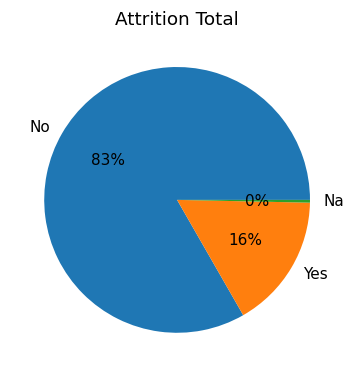

In [113]:
#Ver la distribución de las dos categorías:
df_Attrition = data[{"Attrition", "Age"}].groupby("Attrition").count().sort_values("Age", ascending=False).rename(columns={"Age":"Attrition Total"}).reset_index()

plt.pie(df_Attrition.loc[:,"Attrition Total"], labels = df_Attrition.loc[:, "Attrition"], autopct='%.0f%%')
plt.title('Attrition Total')
plt.show();

Se observa que la moda para la columna Attrition es de "No" (83%) , lo que indica que la mayoría de los empleados no se han ido de la empresa. 

También se logran observar algunos datos Na que son sujetos a corrección, se interpreta error de digitación y se propone cambiar el Na por No.

#### BusinessTravel

(None,)

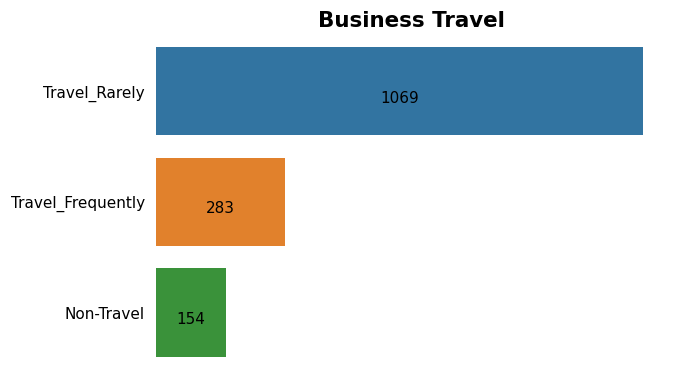

In [114]:
plot_bars(data, "BusinessTravel", "Business Travel",  orientation='h'),

In [115]:
travelRarely=(1069/1506*100)
travelFreq=(283/1506*100)
nonTravel=(154/1506*100)

travelRarely = round(travelRarely, 1)
travelFreq = round(travelFreq, 1)
nonTravel = round(nonTravel, 1)

print("Travel Rarely: ", travelRarely)
print("Travel Frequently: ", travelFreq)
print("Non Travel: ", nonTravel)

Travel Rarely:  71.0
Travel Frequently:  18.8
Non Travel:  10.2


Se identifica que la mayoría de los empleados viajan poco para asuntos de trabajo (71%), seguido de los que viajan mucho (18.8%) y los que viajan ocasionalmente (10.2%).


#### Department

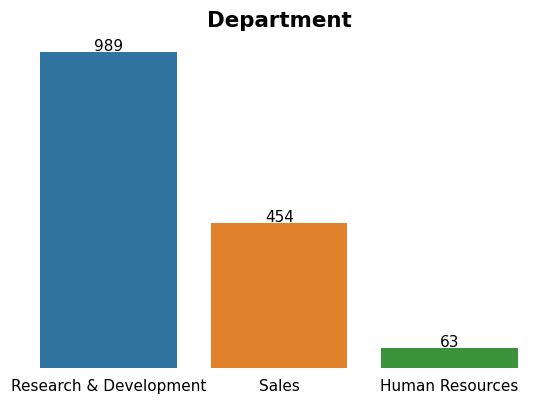

In [116]:
plot_bars(data, "Department", "Department")

In [117]:
sales=(1069/1506*100)
researchDev=(283/1506*100)
humRes=(154/1506*100)

sales = round(sales, 1)
researchDev = round(researchDev, 1)
humRes = round(humRes, 1)

print("Sales: ", sales)
print("Research & Development : ", researchDev)
print("Human Resources: ", humRes)

Sales:  71.0
Research & Development :  18.8
Human Resources:  10.2


Se identifica que la mayoría de los empleados pertenecen al departamento de ventas (71%), seguido de los que pertenecen al departamento de investigación y desarrollo (18.8%) y los que pertenecen al departamento de recursos humanos (10.2%).

#### EducationField

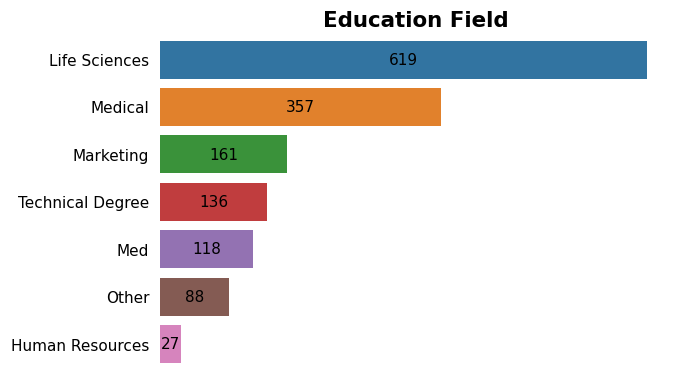

In [118]:
plot_bars(data, "EducationField", "Education Field", orientation='h')

La mayoría de los empleados pertenecen a los campos de educación de Life Sciences y Medical, mientras que la minoría pertenece al campo de educación de Human Resources y Other.

#### Gender

In [119]:
data['Gender'].unique()

array(['Fem', 'Male', 'man', 'Female', 'female'], dtype=object)

In [120]:
data['Gender'].describe()

count     1506
unique       5
top       Male
freq       729
Name: Gender, dtype: object

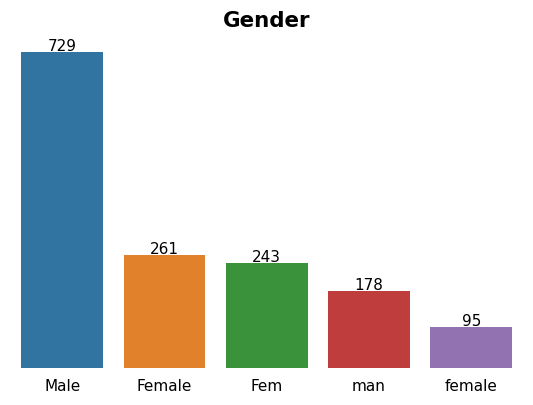

In [121]:
plot_bars(data, 'Gender', 'Gender')

Se identifica que las categorías de género son Female y Male, y las demás categorías, Fem, man, female, son errores de digitación de estos dos géneros.

#### JobRole

In [122]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources',
       'Lab Tech', 'RH'], dtype=object)

In [123]:
data['JobRole'].describe()

count                1506
unique                 11
top       Sales Executive
freq                  330
Name: JobRole, dtype: object

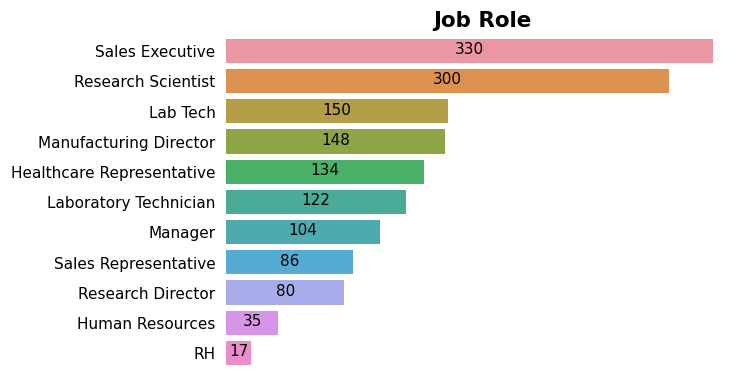

In [124]:
plot_bars(data, 'JobRole', 'Job Role', orientation='h')

Se observa que esta variable tiene una alta cardinalidad, por lo cual se propone agrupar algunos de sus roles. Por ejemplo RH corresponde a Human Resources.


#### MaritalStatus

In [125]:
data['MaritalStatus'].describe()

count        1506
unique          6
top       Married
freq          671
Name: MaritalStatus, dtype: object

In [126]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced', 'S', 'D', 'M'], dtype=object)

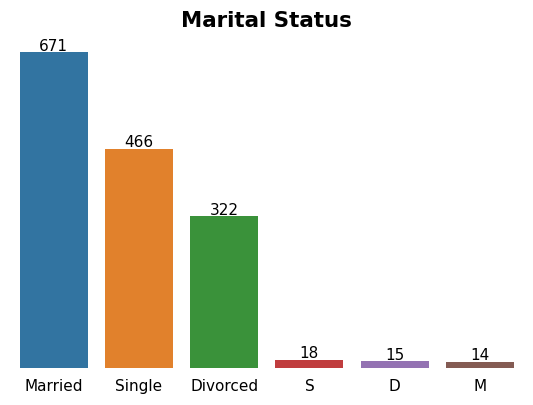

In [127]:
plot_bars(data, 'MaritalStatus', 'Marital Status')

Se observa que las categorías S, D, M, corresponden a Single, Divorced y Married respectivamente, por lo cual se propone agruparlas.

#### Over18

In [128]:
data['Over18'].describe()

count     1506
unique       1
top          Y
freq      1506
Name: Over18, dtype: object

In [129]:
data['Over18'].unique()

array(['Y'], dtype=object)

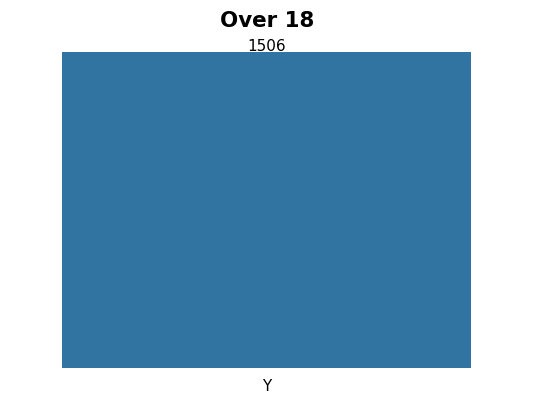

In [130]:
plot_bars(data, 'Over18', 'Over 18')

Se observa que todos los empleados son mayores de 18 años. Por lo cual se propone eliminar esta columna.

#### OverTime

In [131]:
data['OverTime'].describe()

count     1506
unique       3
top         No
freq       941
Name: OverTime, dtype: object

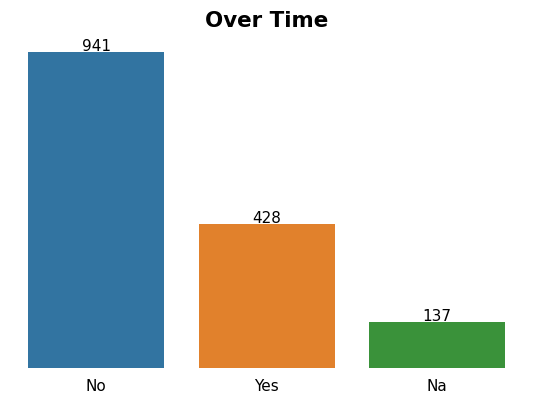

In [132]:
plot_bars(data, 'OverTime', 'Over Time')

Se determina que las categorías de esta variable son Yes y No, y la otra categoría Na, es un error de digitación de No.

#### Education

In [133]:
data['Education'].unique()

array([2, 1, 4, 3, 5, 7])

In [134]:
data['Education'].describe()

count    1506.000000
mean        2.915671
std         1.031172
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: Education, dtype: float64

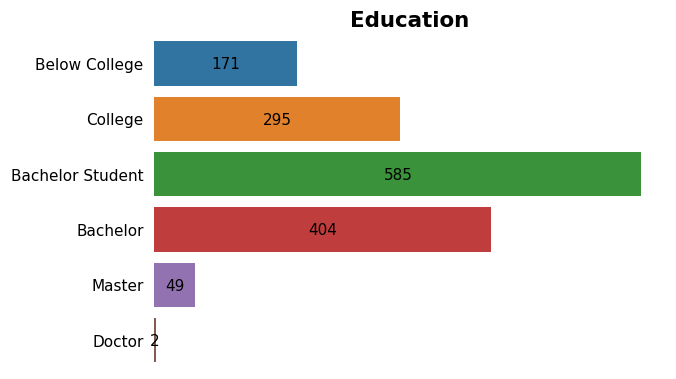

In [135]:
plot_bars(data, 'Education', 'Education', order=None, labels=['Below College', 'College', 'Bachelor Student', 'Bachelor', 'Master', 'Doctor'], orientation='h')

Se observa que la mayoría de los empleados tienen un nivel de educación de 3, seguido de 4 y 2. Se propone agrupar los niveles 5 y 7 en una categoría "5".

#### EnvironmentSatisfaction

In [136]:
data['EnvironmentSatisfaction'].describe()

count    1506.000000
mean        2.729084
std         1.092854
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

In [137]:
data['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

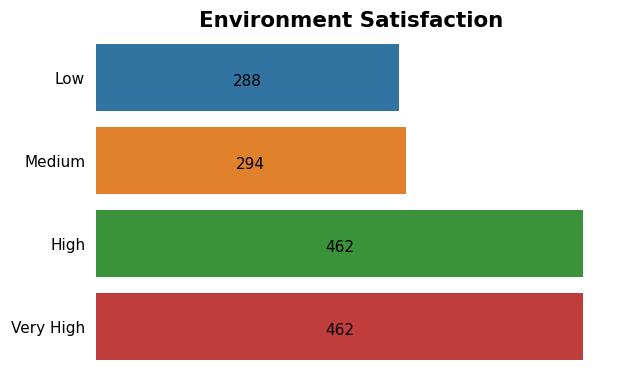

In [138]:
plot_bars(data, 'EnvironmentSatisfaction', 'Environment Satisfaction', order=None, labels=['Low', 'Medium', 'High', 'Very High'], orientation='h')

#### JobInvolvement

In [139]:
data['JobInvolvement'].describe()

count    1506.000000
mean        2.729084
std         0.717816
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

In [140]:
data['JobInvolvement'].unique()

array([3, 2, 4, 1])

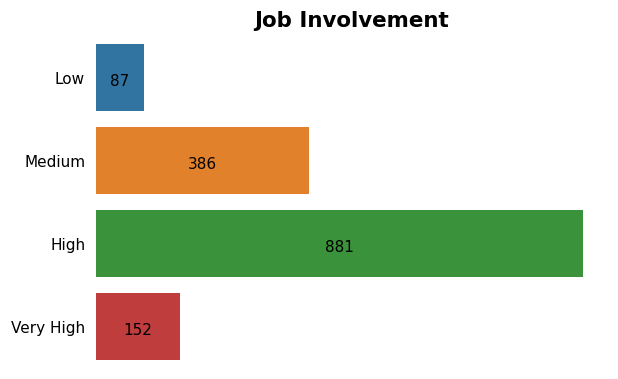

In [141]:
plot_bars(data, 'JobInvolvement', 'Job Involvement', order=None, labels=['Low', 'Medium', 'High', 'Very High'], orientation='h')

La mayoría de los empleados tienen un nivel de involucramiento de 3, seguido de 2 y 4. Esto significa que la mayoría de los empleados se sienten involucrados en su trabajo.

#### JobLevel

In [142]:
data['JobLevel'].describe()

count    1506.000000
mean        2.055113
std         1.106437
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [143]:
data['JobLevel'].unique()

array([2, 1, 3, 4, 5])

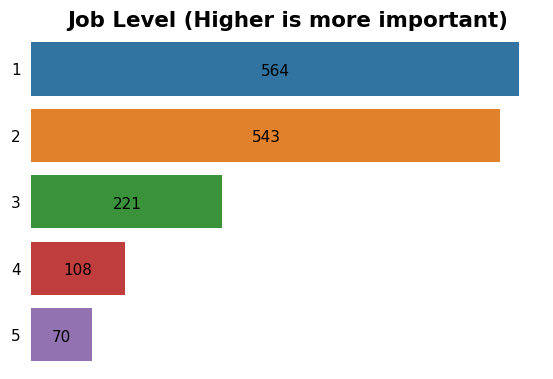

In [144]:
plot_bars(data, 'JobLevel', 'Job Level (Higher is more important)', order=None, labels=['1', '2', '3', '4', '5'], orientation='h')

La mayoría de los empleados tienen un nivel de trabajo de 1, seguido de 2 y 3. Esto significa que la mayoría de los empleados tienen un nivel de trabajo con menor impacto, mientras que un pequeño grupo tiene un trabajo con un mayor impacto en la organización.

#### JobSatisfaction

In [145]:
data['JobSatisfaction'].describe()

count    1494.000000
mean        2.744311
std         1.099938
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [146]:
data['JobSatisfaction'].unique()

array([ 4.,  2.,  3.,  1., nan])

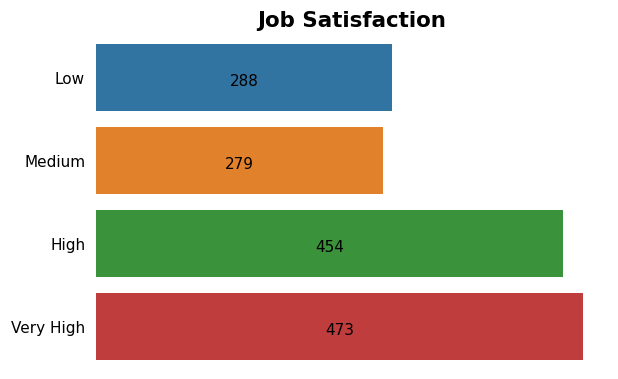

In [147]:
plot_bars(data, 'JobSatisfaction', 'Job Satisfaction', order=None, labels=['Low', 'Medium', 'High', 'Very High'], orientation='h')

In [148]:
vh= 485/1506*100
h = 454/1506*100
m=279/1506*100
l=288/1506*100

vh = round(vh, 1)
h= round(h, 1)
m= round(m, 1)
l= round(l, 1)

print("Very High: ", vh)
print("High: ", h)
print("Medium: ", m)
print("Low: ", l)
print(l+m)

Very High:  32.2
High:  30.1
Medium:  18.5
Low:  19.1
37.6


Se observa que la mayoría de los empleados están muy satisfechos con su trabajo (32.2%), seguido de los que están satisfechos (30.1%), los que están insatisfechos (19.1%) y finalmente los medianamente satisfechos (18.5%).

#### NumCompaniesWorked

In [149]:
data['NumCompaniesWorked'].describe()

count    1506.000000
mean        2.682603
std         2.484541
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [150]:
data['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3])

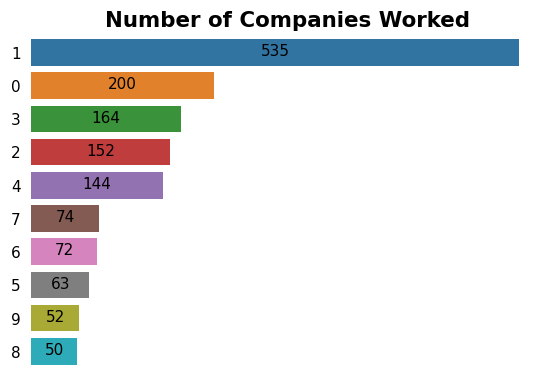

In [151]:
plot_bars(data, 'NumCompaniesWorked', 'Number of Companies Worked', orientation='h')

La mayoría de los empleados han trabajado en 1 empresa, seguido de 0 y 3. Esto significa que la mayoría de los empleados que trabajan en esta empresa, tuvieron un empleo anterior en otra empresa o entrada directamente a esta empresa.

Se propone agrupar los datos en 3 grupos: 0, 1 y 2 o más.

#### PerformanceRating

In [152]:
data['PerformanceRating'].describe()

count    1506.000000
mean        3.152722
std         0.359839
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [153]:
data['PerformanceRating'].unique()

array([3, 4])

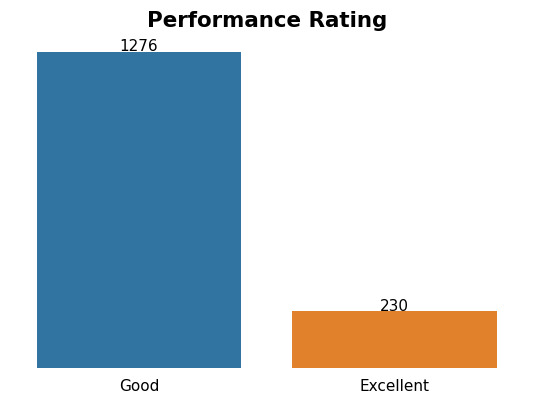

In [154]:
plot_bars(data, 'PerformanceRating', 'Performance Rating', order=None, labels=[ 'Good', 'Excellent'], orientation='v')

Si bien esta variable es numérica, se puede ver como una variable categórica, ya que solo tiene dos valores posibles.

#### RelationshipSatisfaction

In [155]:
data['RelationshipSatisfaction'].describe()

count    1506.000000
mean        2.712483
std         1.080945
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

In [156]:
data['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3])

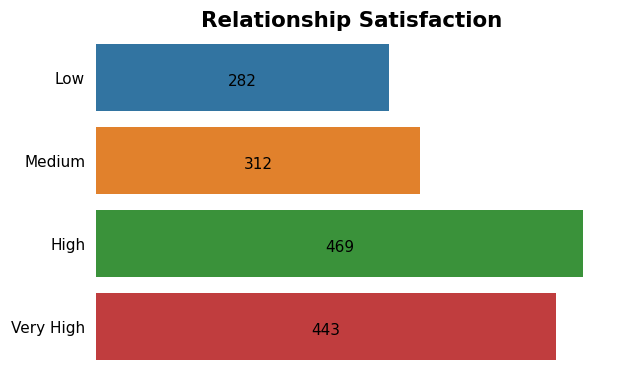

In [157]:
plot_bars(data, 'RelationshipSatisfaction', 'Relationship Satisfaction', order=None, labels=['Low', 'Medium', 'High', 'Very High'], orientation='h')

In [158]:
l= 282/1506*100
m=312/1506*100
h=469/1506*100
vh=443/1506*100

l= round(l, 1)
m= round(m, 1)
h= round(h, 1)
vh= round(vh, 1)

print("Low: ", l, "%")
print("Medium: ", m, "%")
print("High: ", h, "%")
print("Very High: ", vh, "%")

Low:  18.7 %
Medium:  20.7 %
High:  31.1 %
Very High:  29.4 %


Se observa que la mayoría de los empleados están satisfechos con su relación con sus compañeros de trabajo (31.1%), seguido de los que están muy  satisfechos (29.4%),  los medianamente satisfechos (20.7%) y finalmente los que están insatisfechos (18.7%) 

#### StockOptionLevel

In [159]:
data['StockOptionLevel'].describe()

count    1506.000000
mean        0.790173
std         0.850911
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

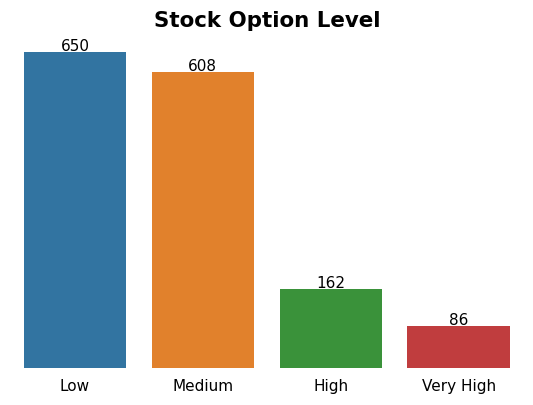

In [160]:
plot_bars(data, 'StockOptionLevel', 'Stock Option Level',labels = ['Low', 'Medium', 'High', 'Very High'], order=None)

El nivel de opciones sobre acciones de la empresa se concentra sobre los valores bajos o medios.

#### TrainingTimesLastYear

In [161]:
data['TrainingTimesLastYear'].describe()

count    1506.000000
mean        2.802789
std         1.293076
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [162]:
data['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6])

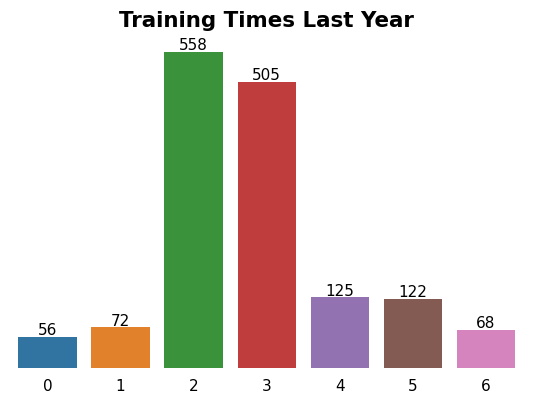

In [163]:
plot_bars(data, 'TrainingTimesLastYear', 'Training Times Last Year', order=None)

Se observa que la mayoría de los empleados han recibido 2 veces capacitación en el último año, seguido de los que han recibido 3 veces.

Se propone agrupar los datos en 3 grupos: 0, 1 y 2, 3 o más.

#### WorkLifeBalance

In [164]:
data['WorkLifeBalance'].describe()

count    1506.000000
mean        2.758964
std         0.705698
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

In [165]:
data['WorkLifeBalance'].unique()

array([1, 3, 2, 4])

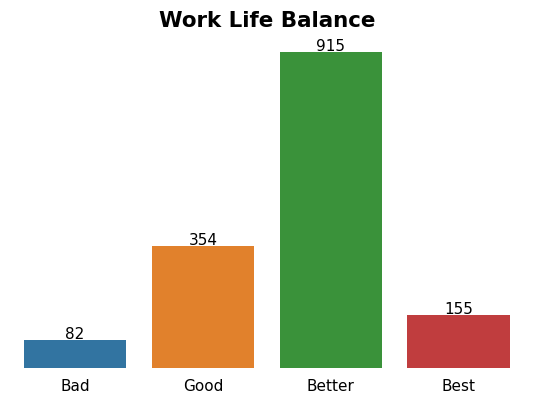

In [166]:
plot_bars(data, 'WorkLifeBalance', 'Work Life Balance', order=None, labels=['Bad', 'Good', 'Better', 'Best'], )

Se observa que la mayoría de los empleados tienen un balance de vida laboral de 3, seguido de 2 y 4. Esto significa que la mayoría de los empleados tienen un balance de vida laboral bueno.

### ii. Análisis de las variables numéricas

Ahora se hace el análisis de variables detipo numéricas.

#### Age

In [167]:
data['Age'].describe()

count    1503.000000
mean       37.086494
std        10.848391
min         3.000000
25%        30.000000
50%        36.000000
75%        43.000000
max       200.000000
Name: Age, dtype: float64

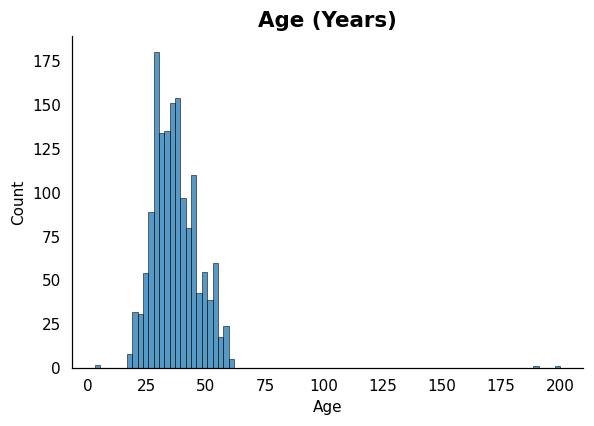

In [168]:
plot_hist(data, 'Age', 'Age (Years)')

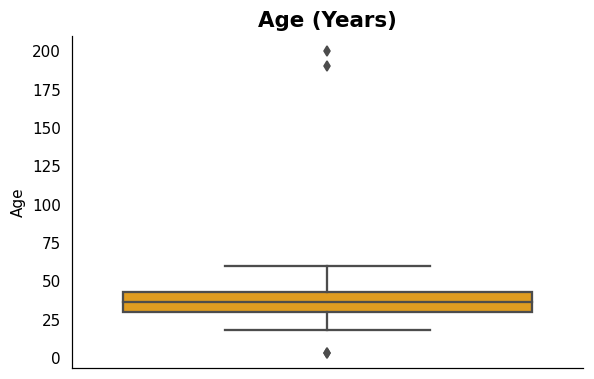

In [169]:
plot_box(data['Age'], 'Age','Age (Years)')

In [170]:
# Se listan los valores atípicos
data[ (data['Age'] > 75) | (data['Age'] < 18) ].sort_values(by=['Age'])

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
511,2.0,3.0,No,Travel_Rarely,913,Research & Development,9,2,Medical,1,512,2,man,48,2,2,Manufacturing Director,Divorced,8847,13934,2,Y,Yes,11,3,3,80.0,1,13,2,3,3,2,0,2,0
958,4.0,3.0,No,Travel_Rarely,943,Research & Development,9,3,Life Sciences,1,959,4,Male,86,3,3,Healthcare Representative,D,8500,5494,0,Y,No,11,3,4,80.0,1,10,0,2,9,7,1,6,0
149,2.0,190.0,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,150,2,Fem,79,3,1,Laboratory Technician,Single,1483,16102,1,Y,No,14,3,4,80.0,0,1,3,3,1,0,0,0,0
1485,4.0,200.0,No,Travel_Rarely,391,Research & Development,16,2,Life Sciences,1,1486,3,Male,96,3,1,Research Scientist,Single,1232,19281,1,Y,No,14,3,4,80.0,0,0,6,3,0,0,0,0,0


Se puede observar que para la columna Age (edad) existen valores atípicos: edades de 3 años (no son posibles) y muy superiores (175 y 200 años). Se tiene una mediana 36.0 y una media 37.086, esta última es afectada por los valores superiores por lo que se propone:

-   Imputar los valores pendientes con la mediana (36.0)
-   Interpretar los valores atípicos como un problema de digitación, por lo cual 3 se reemplaza con 30, 190 por 19 y 200 por 20



#### DailyRate

In [171]:
#Aqui no
data['DailyRate'].describe()

count    1506.000000
mean      803.978752
std       403.962331
min       102.000000
25%       465.000000
50%       805.000000
75%      1161.000000
max      1499.000000
Name: DailyRate, dtype: float64

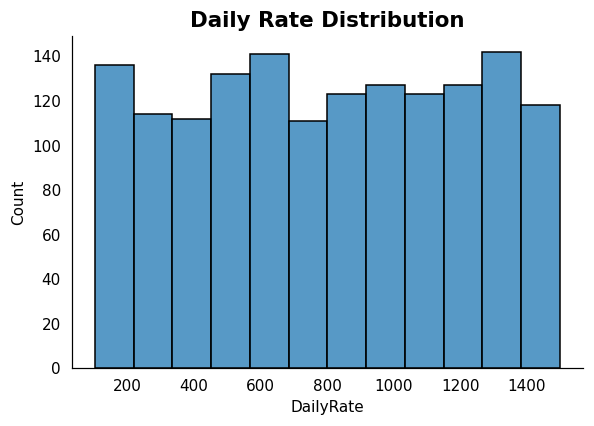

In [172]:
plot_hist(data, 'DailyRate', 'Daily Rate Distribution')

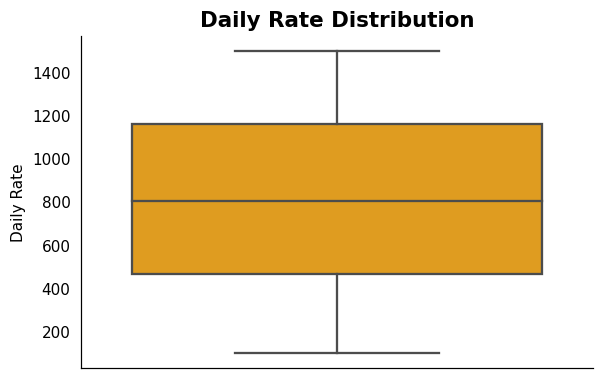

In [173]:
plot_box(data['DailyRate'], 'Daily Rate','Daily Rate Distribution')

El valor de salario (DailyRate) se encuentra en números enteros, y no se observan problemas de valores atípicos.

#### DistanceFromHome

In [174]:
#Aqui no
data['DistanceFromHome'].describe()

count    1506.000000
mean        9.229084
std         8.135153
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

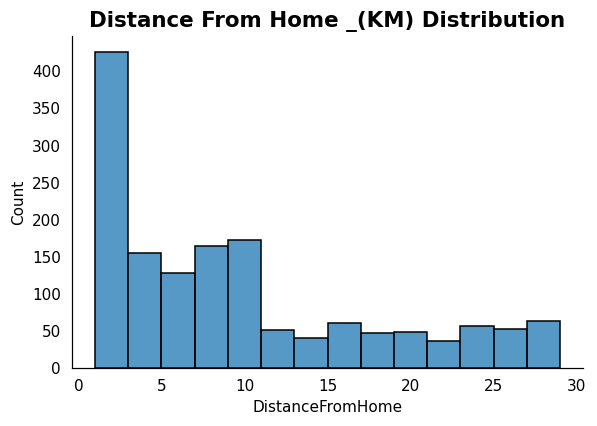

In [175]:
plot_hist(data, 'DistanceFromHome', 'Distance From Home _(KM) Distribution')

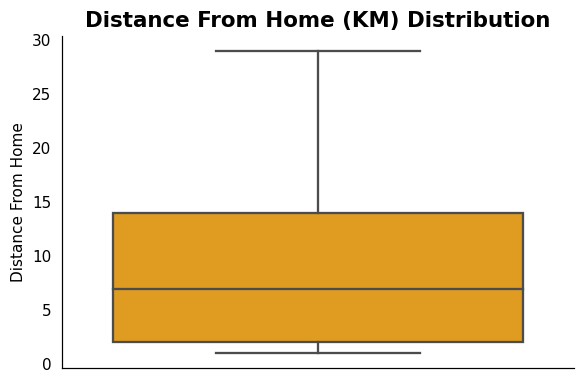

In [176]:
plot_box(data['DistanceFromHome'], 'Distance From Home','Distance From Home (KM) Distribution')

Respecto a la variable 'DistanceFromHome', el 75 percentil se agrupa en 14 pero dado que los valores mayores no son tan superirores (máximo de 29) no se considera tratar estos datos.

#### EmployeeCount

In [177]:
data['EmployeeCount'].describe()

count    1506.000000
mean        1.000664
std         0.025768
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: EmployeeCount, dtype: float64

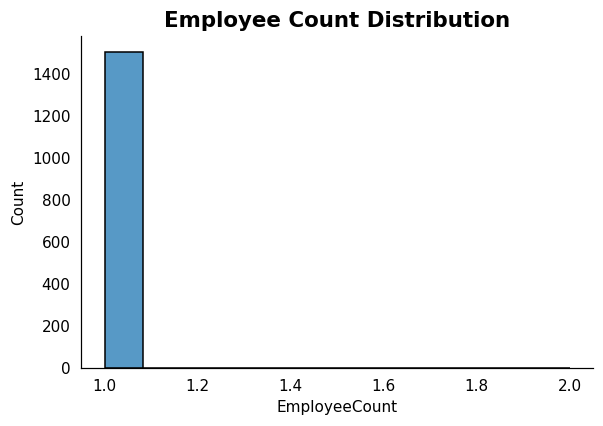

In [178]:
plot_hist(data, 'EmployeeCount', 'Employee Count Distribution')

Esta variable tiene un comportamiento constante, por lo cual se propone eliminarla.

#### EmployeeNumber

In [179]:
data

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Fem,94,3,2,Sales Executive,Single,5993,19479,8,Y,Yes,11,3,1,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,Married,5130,24907,1,Y,No,23,4,4,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,Single,2090,2396,6,Y,Yes,15,3,2,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Fem,56,3,1,Research Scientist,Married,2909,23159,1,Y,Yes,11,3,3,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,Married,3468,16632,9,Y,No,12,3,4,80.0,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.0,No,Non-Travel,845,Sales,1,5,Medical,1,1502,4,Female,45,3,2,Sales Executive,Single,6653,15276,4,Y,No,15,3,2,80.0,0,7,6,3,1,0,0,0,0
1502,2.0,49.0,No,Travel_Rarely,174,Sales,8,4,Technical Degree,1,1503,4,Male,56,2,4,Sales Executive,Married,13120,11879,6,Y,No,17,3,2,80.0,1,22,3,3,9,8,2,3,0
1503,1.0,27.0,No,Travel_Rarely,1302,Research & Development,19,3,Other,1,1504,4,Male,67,2,1,Laboratory Technician,Divorced,4066,16290,1,Y,No,11,3,1,80.0,2,7,3,3,7,7,0,7,0
1504,2.0,44.0,Yes,Travel_Frequently,429,Research & Development,1,2,Medical,1,1505,3,Male,99,3,1,Research Scientist,Divorced,2342,11092,1,Y,Yes,12,3,3,80.0,3,6,2,2,5,3,2,3,0


In [180]:
data['EmployeeNumber'].describe()

count    1506.000000
mean      753.500000
std       434.889066
min         1.000000
25%       377.250000
50%       753.500000
75%      1129.750000
max      1506.000000
Name: EmployeeNumber, dtype: float64

In [181]:
data['EmployeeNumber'].head()

0    1
1    2
2    3
3    4
4    5
Name: EmployeeNumber, dtype: int64

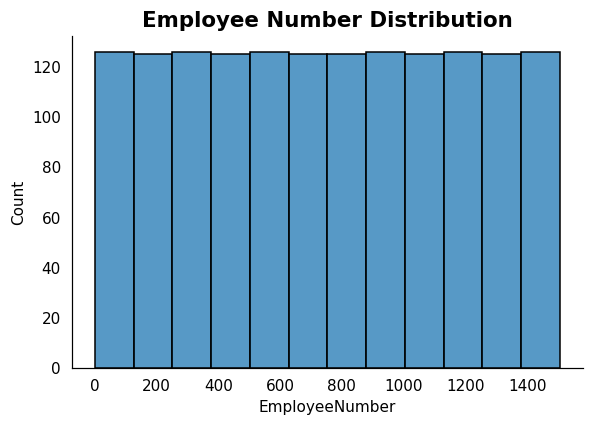

In [182]:
plot_hist(data, 'EmployeeNumber', 'Employee Number Distribution')

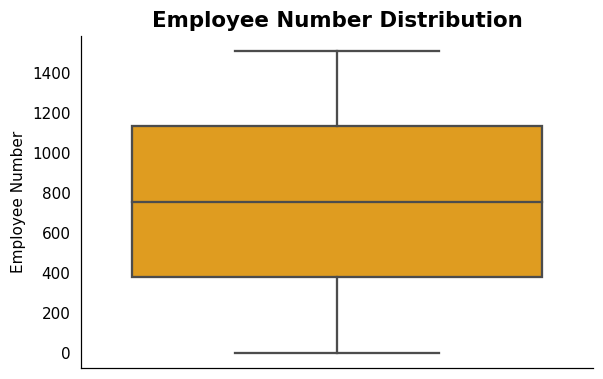

In [183]:
plot_box(data['EmployeeNumber'], 'Employee Number','Employee Number Distribution')

Si bien esta es una variable numérica, estos valores corresponden a un identificador único para cada empleado, por lo cual se entiende que es una variable categórica con un alta cardinalidad y se propone eliminarla.

#### HourlyRate

In [184]:
data['HourlyRate'].describe()

count    1506.000000
mean       66.280212
std        21.275971
min        30.000000
25%        48.000000
50%        66.000000
75%        84.000000
max       190.000000
Name: HourlyRate, dtype: float64

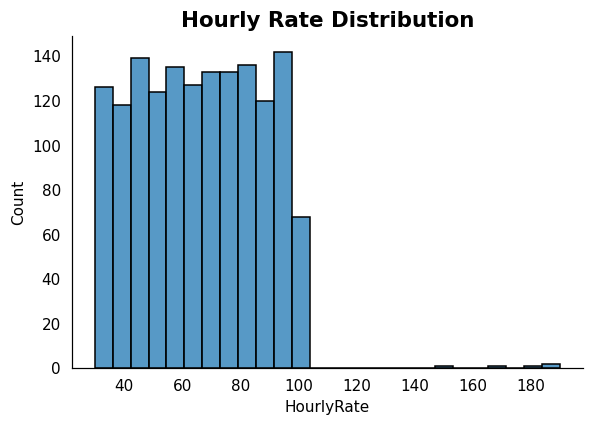

In [185]:
plot_hist(data, 'HourlyRate', 'Hourly Rate Distribution')

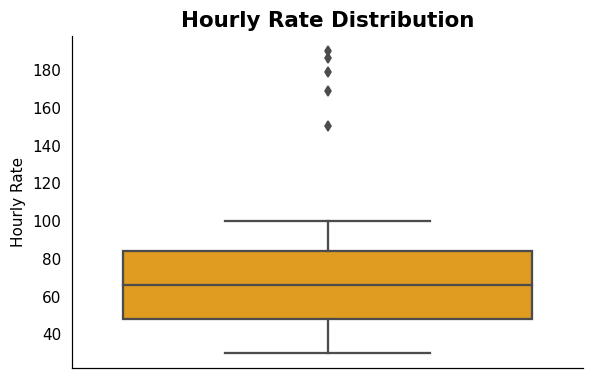

In [186]:
plot_box(data['HourlyRate'], 'Hourly Rate','Hourly Rate Distribution')

In [187]:
# Se listan los valores atípicos
data[(data['HourlyRate'] > 100)]['HourlyRate']

264     179
457     169
793     150
1023    190
1416    186
Name: HourlyRate, dtype: int64

Es posible que los valores outliers, hayan sido digitados erróneamente, por lo que se propone:

*   Interpretar los valores atípicos como un problema de digitación, por lo cual 150 se reemplaza con 50, 169 por 69, 179 por 79, 186 por 86 y 190 por 90.

#### MonthlyIncome

In [188]:
data['MonthlyIncome'].describe()

count    1.506000e+03
mean     1.303036e+04
std      2.551646e+05
min      2.500000e+01
25%      2.886000e+03
50%      4.877500e+03
75%      8.307750e+03
max      9.907000e+06
Name: MonthlyIncome, dtype: float64

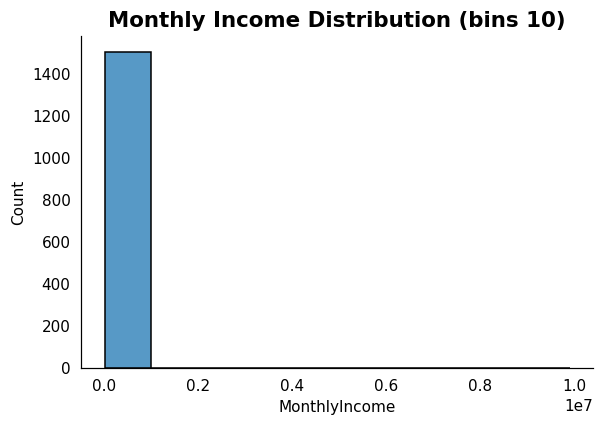

In [189]:
plot_hist(data, 'MonthlyIncome', 'Monthly Income Distribution (bins 10)', bins=10)

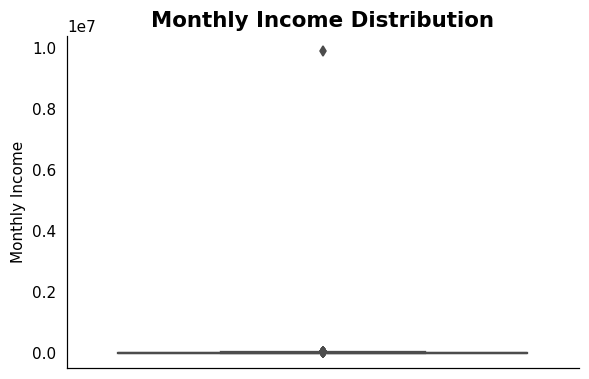

In [190]:
plot_box(data['MonthlyIncome'], 'Monthly Income','Monthly Income Distribution')

In [191]:
# count atipical values
data.loc[data['MonthlyIncome'] > 15000, 'MonthlyIncome'].count()

136

In [192]:
# show top 10 highest values
data['MonthlyIncome'].sort_values(ascending=False).head(10)

1326    9907000
190       19999
746       19973
851       19943
165       19926
568       19859
918       19847
749       19845
1242      19833
898       19740
Name: MonthlyIncome, dtype: int64

In [194]:
# show top 10 lowest values
data['MonthlyIncome'].sort_values(ascending=True).head(10)


72        25
974       50
513     1009
727     1051
764     1052
1338    1081
1365    1091
177     1102
911     1118
1402    1129
Name: MonthlyIncome, dtype: int64

Lo primero es tratar el valor 9907000, se procede a dividirlo por 1000 para obtener un valor más cercano a la moda.

Se revisan los valores superiores a 12000 se podrían consideran atípicos, esto puede ser causado por un error de digitación, por lo que se procede a:
- Revisar a quién pertenece el valor atípico para confirmar

In [196]:
# List top 10 MonthlyIncome values and and its corresponding JobRole
data[['MonthlyIncome', 'JobRole']].sort_values(by='MonthlyIncome', ascending=False).head(20)

,MonthlyIncome,JobRole
1326,9907000,Sales Executive
190,19999,Manager
746,19973,Research Director
851,19943,Manager
165,19926,Manager
568,19859,Manager
918,19847,Manager
749,19845,Manager
1242,19833,Manager
898,19740,Research Director


Al parecer los valores atípicos corresponden a personal con rol directivo, por lo cual se determina que son correctos y se procede a dejarlos como están.

#### MonthlyRate

In [ ]:
data['MonthlyRate'].describe()

count     1506.000000
mean     14244.022576
std       7105.627164
min       2094.000000
25%       8041.250000
50%      14144.000000
75%      20385.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

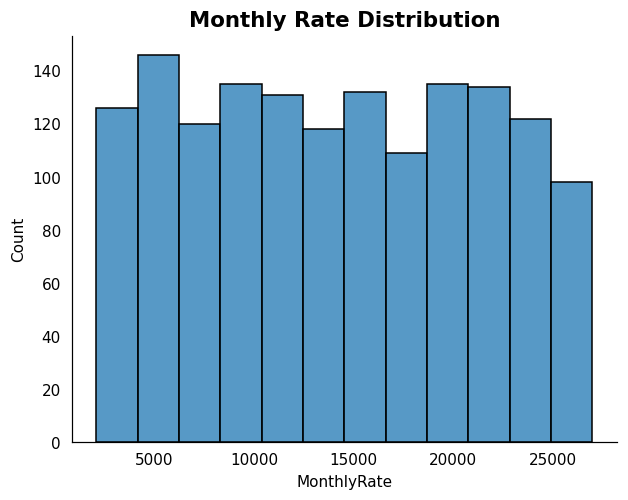

In [ ]:
plot_hist(data, 'MonthlyRate', 'Monthly Rate Distribution')


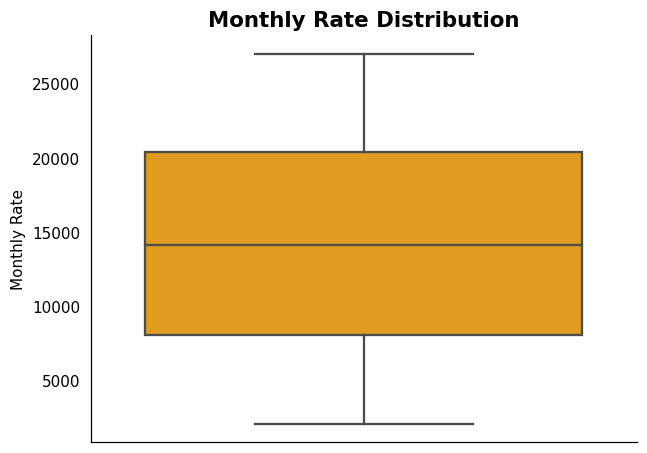

In [ ]:
plot_box(data['MonthlyRate'], 'Monthly Rate','Monthly Rate Distribution')

La variable no presenta valores atípicos. Se obseva que la tarifa mensual de un trabajador esta entre los 10000 y 20000.

#### PercentSalaryHike

In [ ]:
data['PercentSalaryHike'].describe()

count    1506.000000
mean       15.191899
std         3.655746
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

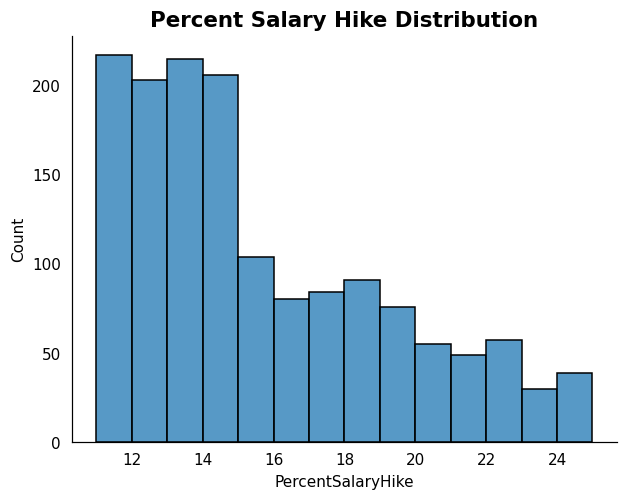

In [ ]:
plot_hist(data, 'PercentSalaryHike', 'Percent Salary Hike Distribution')

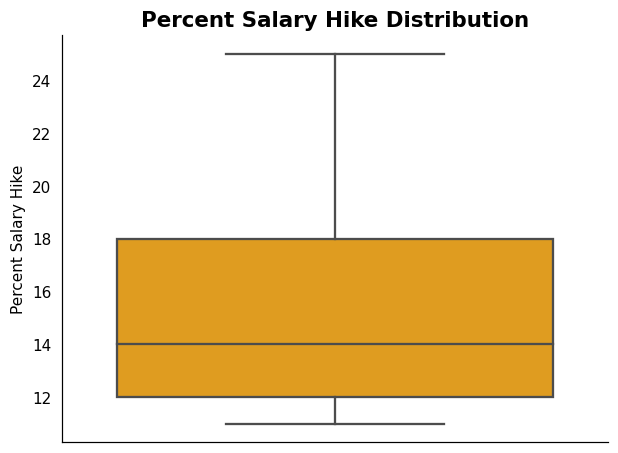

In [ ]:
plot_box(data['PercentSalaryHike'], 'Percent Salary Hike','Percent Salary Hike Distribution')

La distribución del porcentaje de aumento salarial está entre 12 y 18, y quien más obtuvo aumento fue de un 25.

No se observan problemas de calidad para esta columna.


In [100]:
data[ (data['JobRole'] == 'Sales Executive') ]['MonthlyIncome'].describe()

count    3.300000e+02
mean     3.692085e+04
std      5.449867e+05
min      5.000000e+01
25%      5.027250e+03
50%      6.238000e+03
75%      8.606000e+03
max      9.907000e+06
Name: MonthlyIncome, dtype: float64

#### StandardHours

In [ ]:
data['StandardHours'].describe()

count    1499.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

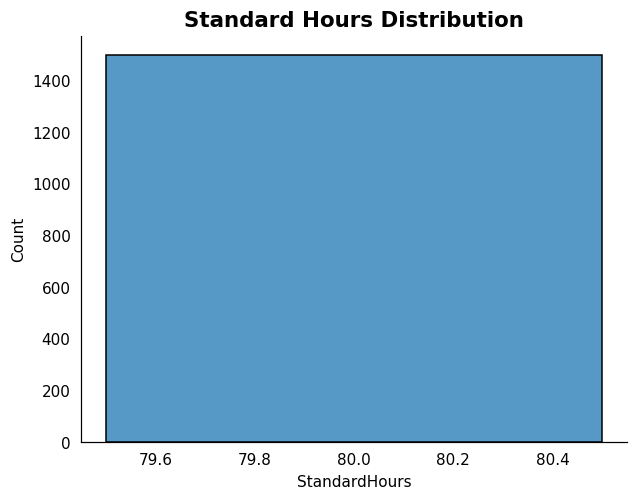

In [ ]:
plot_hist(data, 'StandardHours', 'Standard Hours Distribution')

Esta variable tiene un comportamiento constante, por lo cual se propone eliminarla.

#### TotalWorkingYears

In [ ]:
data['TotalWorkingYears'].describe()

count    1506.000000
mean       11.220452
std         7.778530
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

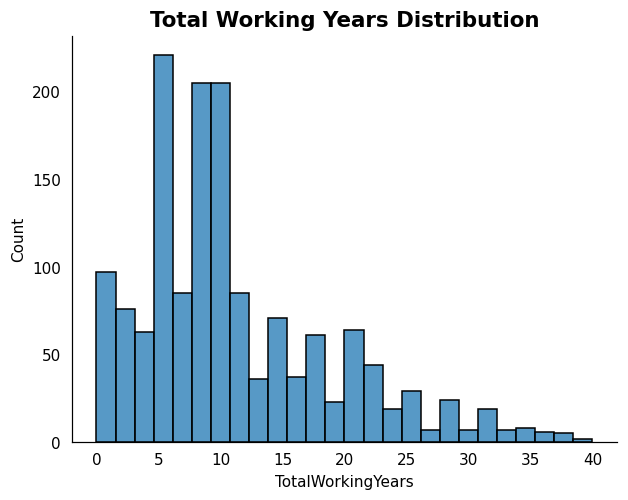

In [ ]:
plot_hist(data, 'TotalWorkingYears', 'Total Working Years Distribution')

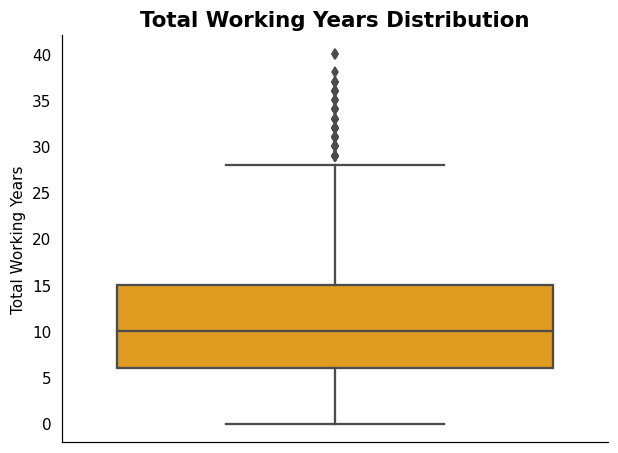

In [ ]:
plot_box(data['TotalWorkingYears'], 'Total Working Years','Total Working Years Distribution')

Para determinar si los valore atipicos tienen sentido, se realiza un filtro para verificar que la edad de estos trabajadores sea mayor a 48 años para validar que los años trabajados correspondan con la edad minima de empleabilidad (18)

In [ ]:
data[ (data['TotalWorkingYears'] > 30) ]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
18,4.0,53.0,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,...,80.0,0,31,3,3,25,8,3,7,0
85,4.0,56.0,No,Travel_Rarely,1400,Research & Development,7,3,Life Sciences,1,...,80.0,0,37,3,2,6,4,0,2,0
98,3.0,58.0,No,Travel_Rarely,682,Sales,10,4,Medical,1,...,80.0,0,38,1,2,37,10,1,8,0
126,4.0,58.0,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,...,80.0,1,40,3,2,40,10,15,6,0
187,2.0,55.0,No,Travel_Rarely,692,Research & Development,14,4,Medical,1,...,80.0,0,36,3,3,24,15,2,15,0
190,3.0,52.0,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,...,80.0,1,34,5,3,33,18,11,9,0
233,4.0,50.0,No,Travel_Rarely,854,Sales,1,4,Medical,1,...,80.0,1,32,3,2,7,0,0,6,0
237,3.0,52.0,No,Non-Travel,771,Sales,2,4,Life Sciences,1,...,80.0,0,33,2,4,33,7,15,12,0
270,1.0,55.0,No,Travel_Rarely,452,Research & Development,1,3,Medical,1,...,80.0,0,37,2,3,36,10,4,13,0
401,1.0,56.0,No,Travel_Frequently,906,Sales,6,3,Life Sciences,1,...,80.0,3,36,0,2,7,7,7,7,0


Al parecer los valores atípicos son correctos, por lo que no se propone ninguna modificación.

#### YearsAtCompany

In [ ]:
data['YearsAtCompany'].describe()

count    1506.000000
mean        7.041169
std         6.568092
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       100.000000
Name: YearsAtCompany, dtype: float64

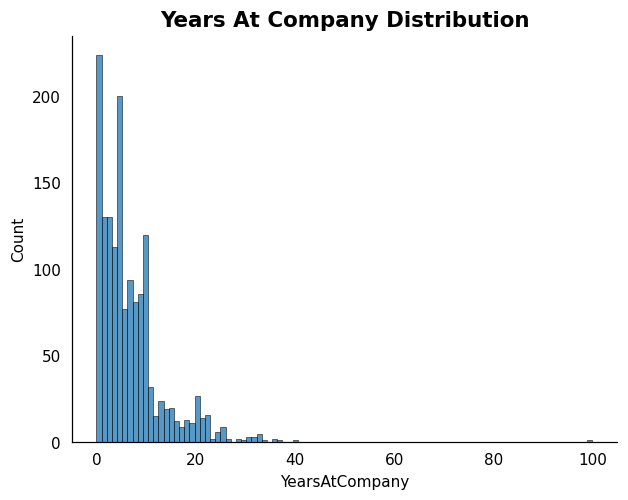

In [ ]:
plot_hist(data, 'YearsAtCompany', 'Years At Company Distribution')

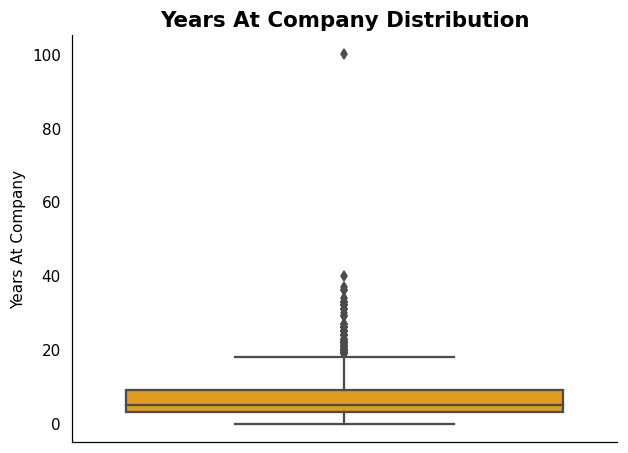

In [ ]:
plot_box(data['YearsAtCompany'], 'Years At Company','Years At Company Distribution')

In [ ]:
# Se listan los valores atípico
data[ (data['YearsAtCompany'] > 30) ][['YearsAtCompany', 'Age']]


,YearsAtCompany,Age
98,37,58.0
126,40,58.0
190,33,52.0
237,33,52.0
270,36,55.0
473,31,49.0
477,32,50.0
503,100,34.0
561,34,52.0
595,31,58.0


Se observa que los años trabajados por los empleados se encuentran entre 0 y 40 años, sin embargo, se observa que hay un valor atípico de 100 años. Parece ser un error de digitación, por lo cual se propone:

*   Interpretar los valores atípicos como un problema de digitación, por lo cual 100 se reemplaza con 10

#### YearsInCurrentRole

In [ ]:
data['YearsInCurrentRole'].describe()

count    1506.000000
mean        4.212483
std         3.618337
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

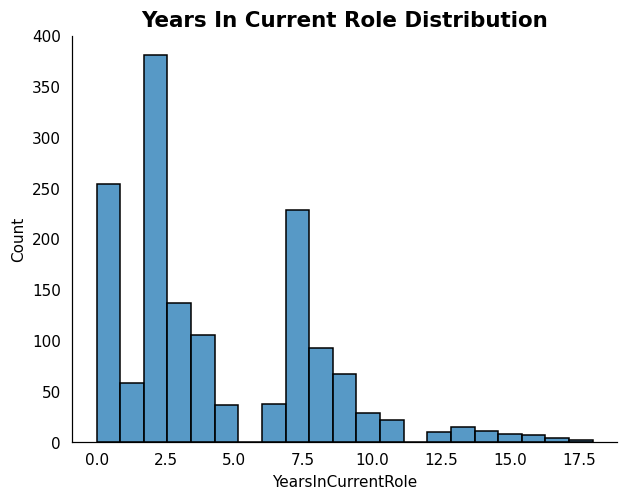

In [ ]:
plot_hist(data, 'YearsInCurrentRole', 'Years In Current Role Distribution')

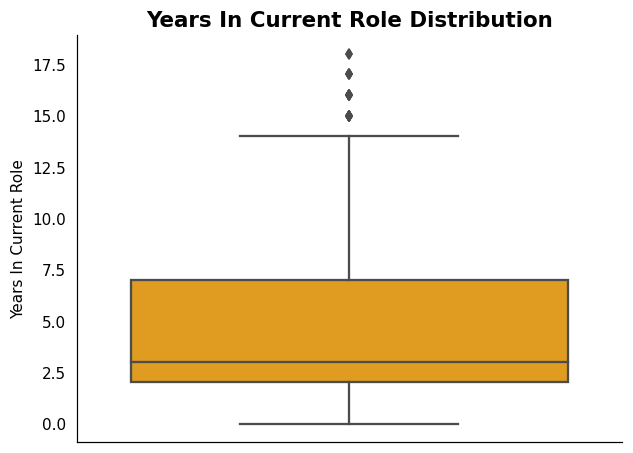

In [ ]:
plot_box(data['YearsInCurrentRole'], 'Years In Current Role','Years In Current Role Distribution')

In [ ]:
# Se listan los valores atípico
data[ (data['YearsInCurrentRole'] > 14) ][['YearsAtCompany', 'Age', 'YearsInCurrentRole']]

,YearsAtCompany,Age,YearsInCurrentRole
45,22,41.0,15
63,21,59.0,16
123,20,51.0,18
187,24,55.0,15
190,33,52.0,18
231,22,42.0,17
281,20,42.0,16
417,20,40.0,15
466,18,41.0,16
595,31,58.0,15


Parece ser que los valores atípicos son correctos, por lo cual no se propone ninguna modificación.

#### YearsSinceLastPromotion

In [ ]:
data['YearsSinceLastPromotion'].describe()

count    1506.000000
mean        2.169987
std         3.196186
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

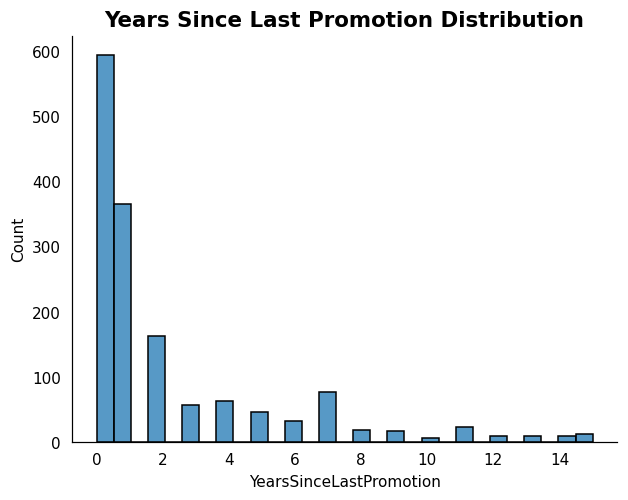

In [ ]:
plot_hist(data, 'YearsSinceLastPromotion', 'Years Since Last Promotion Distribution')

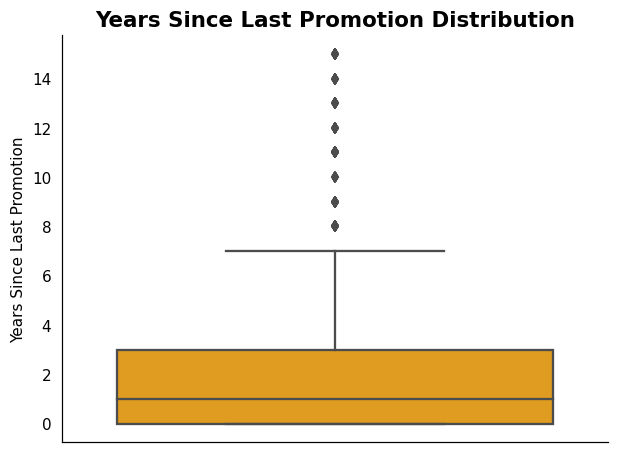

In [ ]:
plot_box(data['YearsSinceLastPromotion'], 'Years Since Last Promotion','Years Since Last Promotion Distribution')

In [ ]:
data[ (data['YearsSinceLastPromotion'] > 14) ][['YearsAtCompany', 'Age', 'YearsInCurrentRole', 'YearsSinceLastPromotion']]

,YearsAtCompany,Age,YearsInCurrentRole,YearsSinceLastPromotion
45,22,41.0,15,15
123,20,51.0,18,15
126,40,58.0,10,15
178,24,46.0,13,15
237,33,52.0,7,15
425,27,50.0,10,15
701,17,53.0,13,15
752,17,36.0,13,15
861,26,46.0,15,15
914,33,55.0,9,15


Dado que los valores atípicos son correctos, no se propone ninguna modificación.

#### YearsWithCurrManager

In [ ]:
data['YearsWithCurrManager'].describe()

count    1506.000000
mean        4.112882
std         3.572208
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

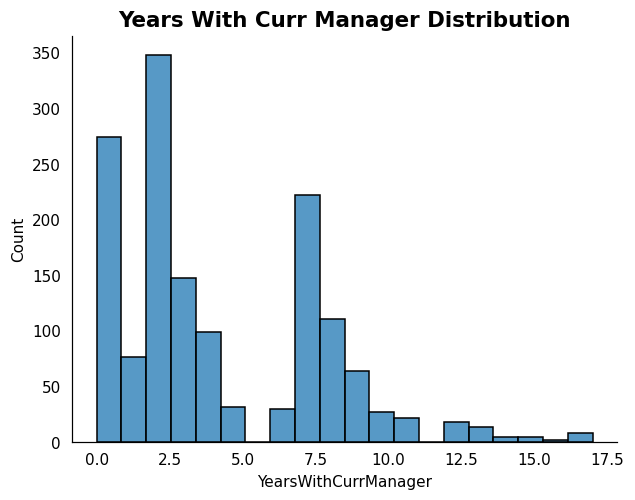

In [ ]:
plot_hist(data, 'YearsWithCurrManager', 'Years With Curr Manager Distribution')

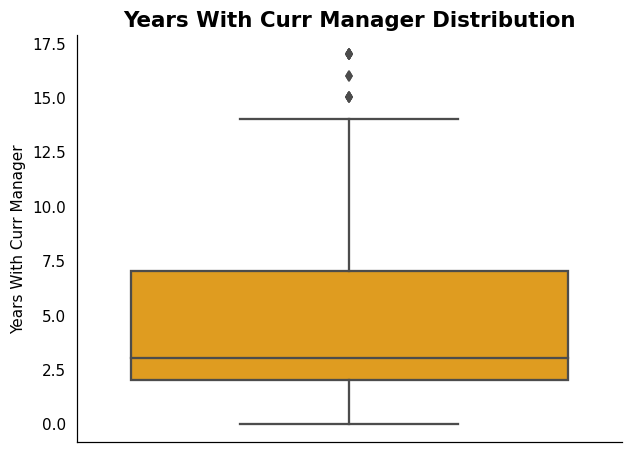

In [ ]:
plot_box(data['YearsWithCurrManager'], 'Years With Curr Manager','Years With Curr Manager Distribution')

In [ ]:
data[ (data['YearsWithCurrManager'] > 14) ][['YearsAtCompany', 'Age', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

,YearsAtCompany,Age,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,22,44.0,6,5,17
123,20,51.0,18,15,15
153,17,45.0,9,0,15
187,24,55.0,15,2,15
231,22,42.0,17,11,15
386,18,37.0,7,12,17
561,34,52.0,6,1,16
616,20,51.0,6,4,17
635,17,35.0,14,5,15
686,18,41.0,13,2,17


Dados que los valores atípicos son correctos, no se propone ninguna modificación.

### iii. Análisis bi-variado

Primero se revisa la matriz de correlación de las columnas:

In [ ]:
#valores de correlación entre los datos
data.corr()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
JobSatisfaction,1.000000,-0.005410,0.033241,0.003172,-0.007775,-0.012278,-0.063965,-0.013650,0.000214,-0.005781,...,-0.008027,0.001676,-0.019426,-0.029830,-0.021532,-0.003540,-0.003565,-0.017576,-0.024700,0.101413
Age,-0.005410,1.000000,0.011857,-0.011983,0.205082,0.009196,0.021597,0.026586,0.510730,0.500800,...,0.054534,0.038814,0.678911,0.013750,-0.019200,0.314728,0.217701,0.217935,0.204402,0.011759
DailyRate,0.033241,0.011857,1.000000,-0.003234,-0.019046,0.020272,0.027250,0.039691,0.000630,0.006892,...,0.007040,0.043561,0.012592,-0.017794,-0.041068,-0.035999,0.011055,-0.032282,-0.031137,0.004610
DistanceFromHome,0.003172,-0.011983,-0.003234,1.000000,0.012374,-0.014165,0.026279,0.005401,0.001254,-0.019538,...,0.001979,0.047167,-0.002332,-0.040841,-0.030884,0.004894,0.016900,0.008902,0.015389,0.037883
Education,-0.007775,0.205082,-0.019046,0.012374,1.000000,-0.022871,0.009905,0.033030,0.108710,0.102692,...,-0.007608,0.014128,0.153353,-0.015864,0.017875,0.073966,0.064581,0.055116,0.071769,0.022225
EnvironmentSatisfaction,-0.012278,0.009196,0.020272,-0.014165,-0.022871,1.000000,-0.051749,-0.003840,0.003015,-0.006272,...,0.006015,0.005281,-0.001568,0.021119,0.031582,0.000837,0.022633,0.015095,-0.004926,-0.025629
HourlyRate,-0.063965,0.021597,0.027250,0.026279,0.009905,-0.051749,1.000000,0.042138,-0.035186,-0.022432,...,-0.004728,0.054696,-0.008722,-0.005360,-0.010129,-0.024853,-0.029636,-0.027605,-0.026688,0.023737
JobInvolvement,-0.013650,0.026586,0.039691,0.005401,0.033030,-0.003840,0.042138,1.000000,-0.012979,-0.015168,...,0.039985,0.024357,-0.010003,-0.009336,-0.022748,-0.027031,0.008620,-0.025673,0.021522,0.002612
JobLevel,0.000214,0.510730,0.000630,0.001254,0.108710,0.003015,-0.035186,-0.012979,1.000000,0.949999,...,0.025480,0.013703,0.783905,-0.012194,0.038299,0.538469,0.397059,0.354341,0.379368,0.042800
MonthlyIncome,-0.005781,0.500800,0.006892,-0.019538,0.102692,-0.006272,-0.022432,-0.015168,0.949999,1.000000,...,0.028821,0.006888,0.774130,-0.016964,0.029836,0.518729,0.372288,0.346353,0.349434,0.049784


Respecto a los valores de las correlaciones en el caso de EmployeeCount y StandardHours no se tienen en cuenta, ya que como se vió anteriormente los valores son constantes, por lo cual se puede pensar en no usar éstas columnas para el modelo.

In [ ]:
#Revisar valores de correlación respecto a la variable objetivo JobSatisfaction:
pd.DataFrame(data=data.corr())['JobSatisfaction'].abs().sort_values(ascending=False)

JobSatisfaction             1.000000
NewEmployee                 0.101413
HourlyRate                  0.063965
NumCompaniesWorked          0.059531
DailyRate                   0.033241
TrainingTimesLastYear       0.029830
YearsWithCurrManager        0.024700
WorkLifeBalance             0.021532
TotalWorkingYears           0.019426
YearsSinceLastPromotion     0.017576
JobInvolvement              0.013650
PercentSalaryHike           0.012874
EnvironmentSatisfaction     0.012278
MonthlyRate                 0.011491
RelationshipSatisfaction    0.008027
Education                   0.007775
PerformanceRating           0.007533
MonthlyIncome               0.005781
Age                         0.005410
YearsInCurrentRole          0.003565
YearsAtCompany              0.003540
DistanceFromHome            0.003172
StockOptionLevel            0.001676
JobLevel                    0.000214
Name: JobSatisfaction, dtype: float64

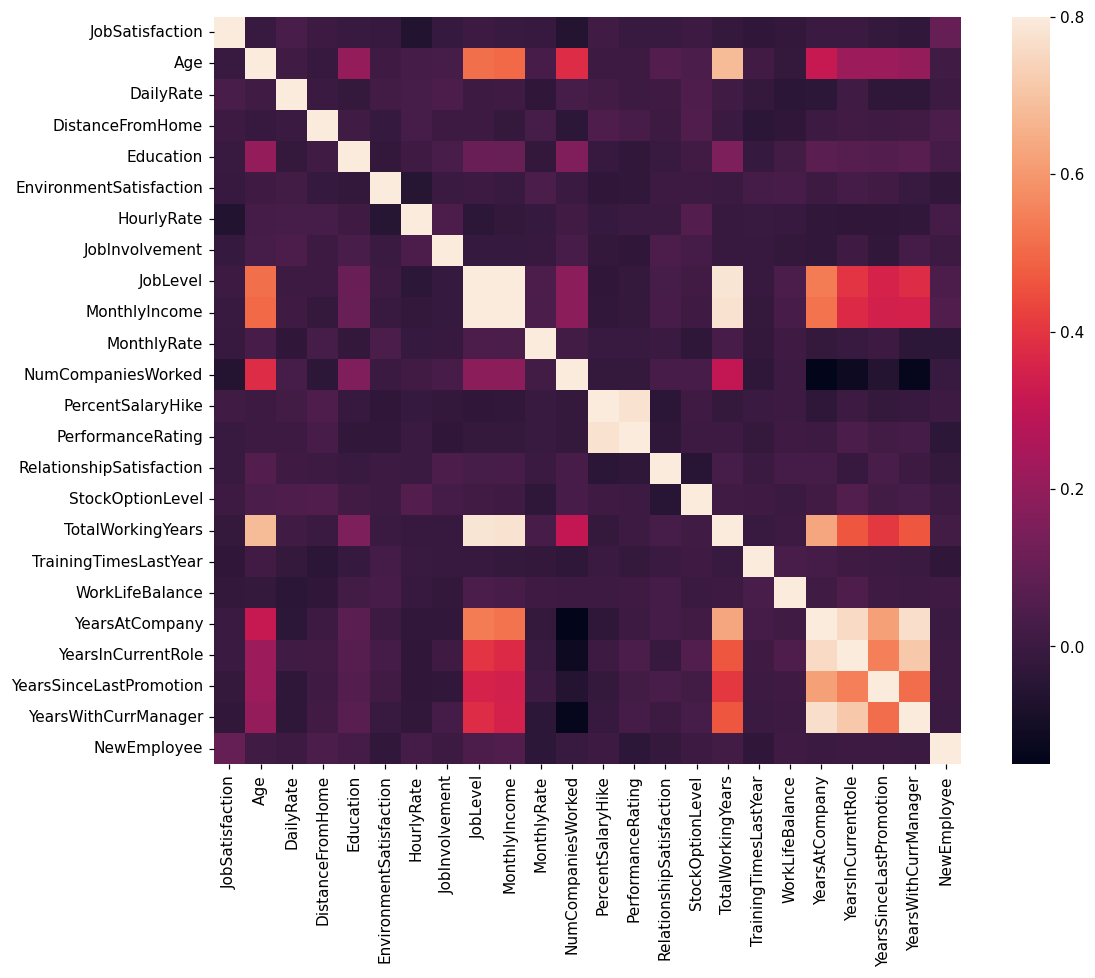

In [ ]:
matriz = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz, vmax=.8, square=True);

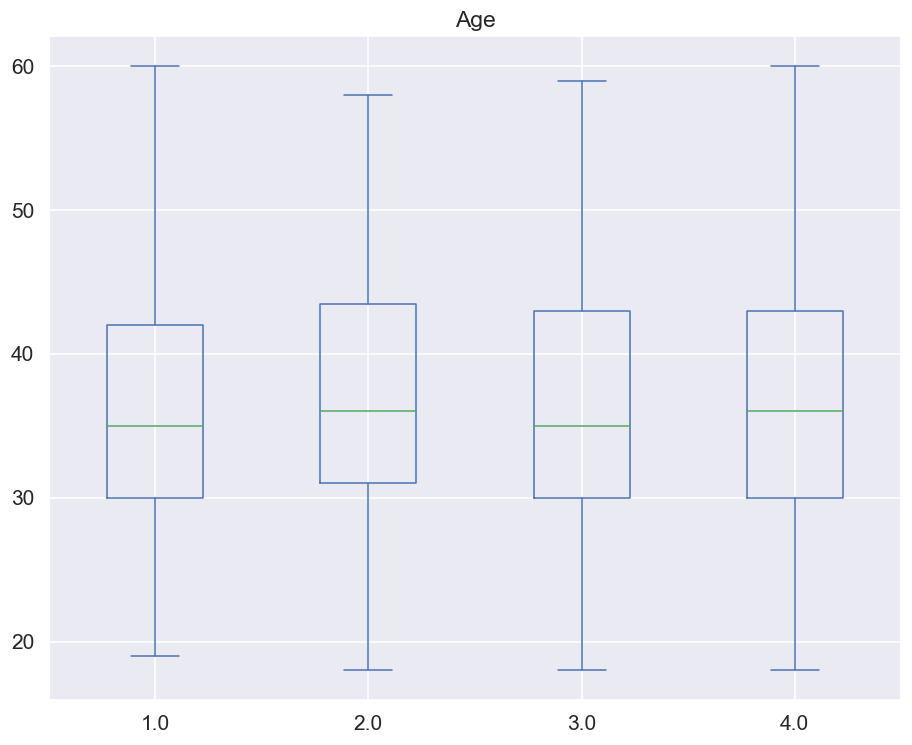

In [ ]:
ax = df.plot.box(column="Age", by="JobSatisfaction", figsize=(10, 8))

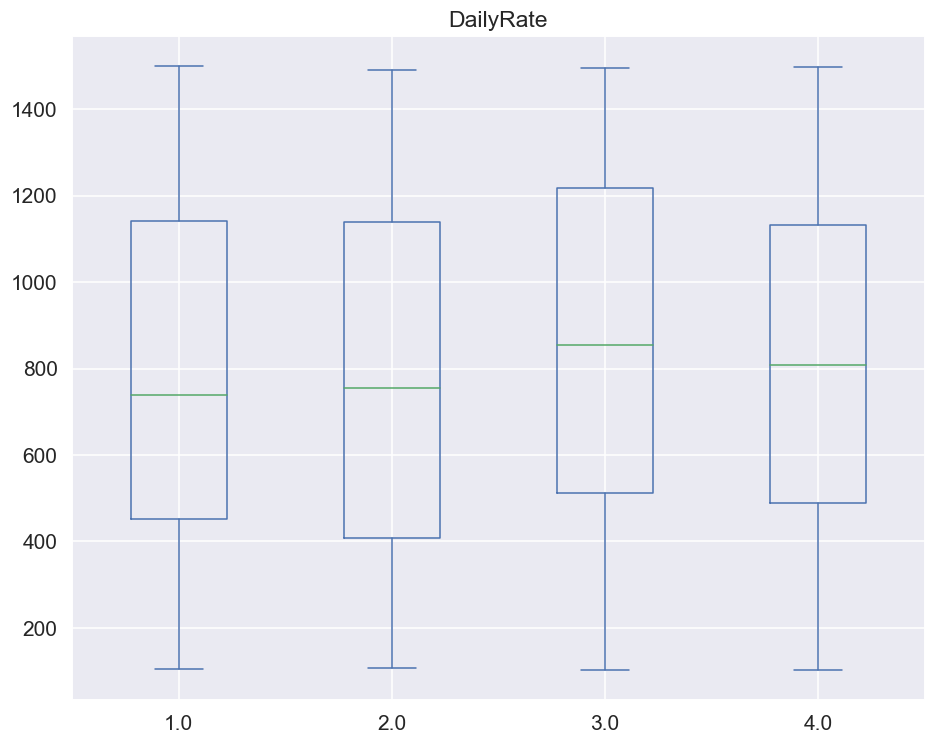

In [ ]:
ax = df.plot.box(column="DailyRate", by="JobSatisfaction", figsize=(10, 8))

DistanceFromHome    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

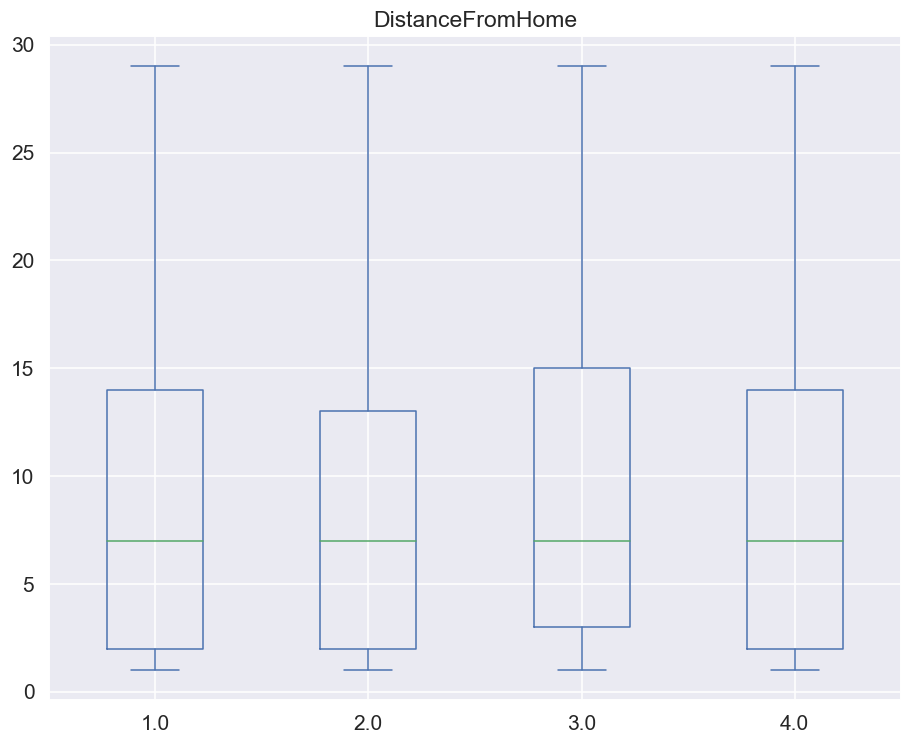

In [ ]:
df.plot.box(column="DistanceFromHome", by="JobSatisfaction", figsize=(10, 8))

Education    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

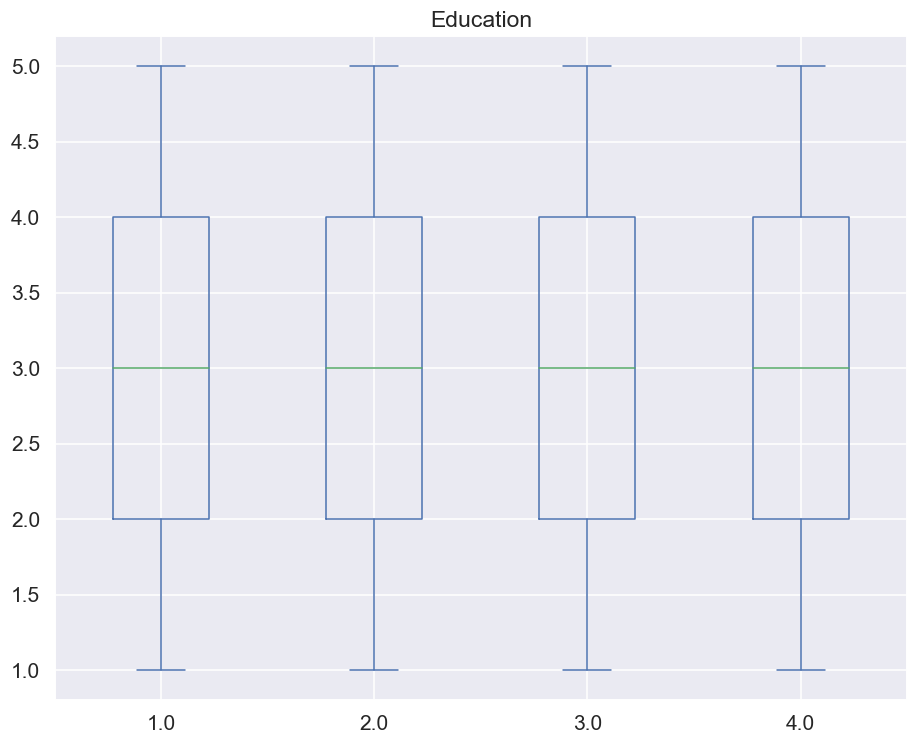

In [ ]:
df.plot.box(column="Education", by="JobSatisfaction", figsize=(10, 8))

EnvironmentSatisfaction    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

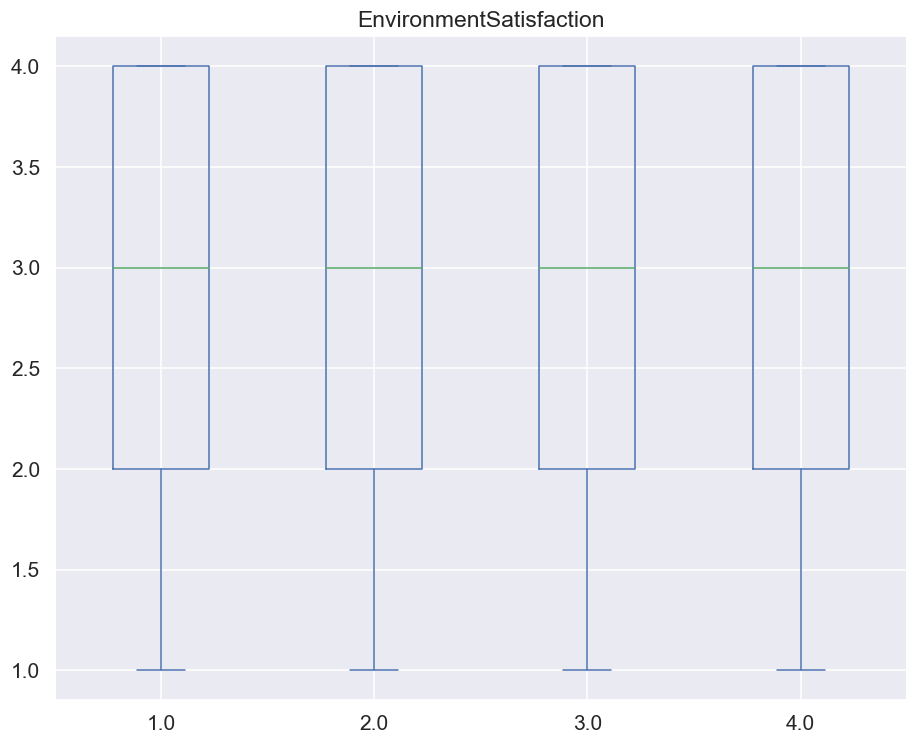

In [ ]:
df.plot.box(column="EnvironmentSatisfaction", by="JobSatisfaction", figsize=(10, 8))

HourlyRate    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

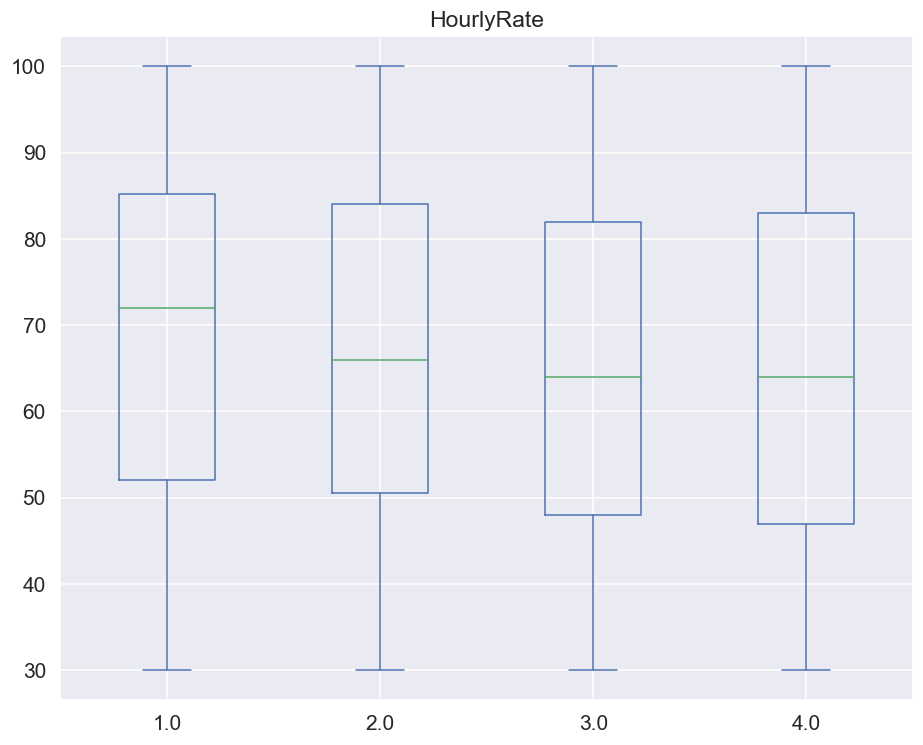

In [ ]:
df.plot.box(column="HourlyRate", by="JobSatisfaction", figsize=(10, 8))

JobInvolvement    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

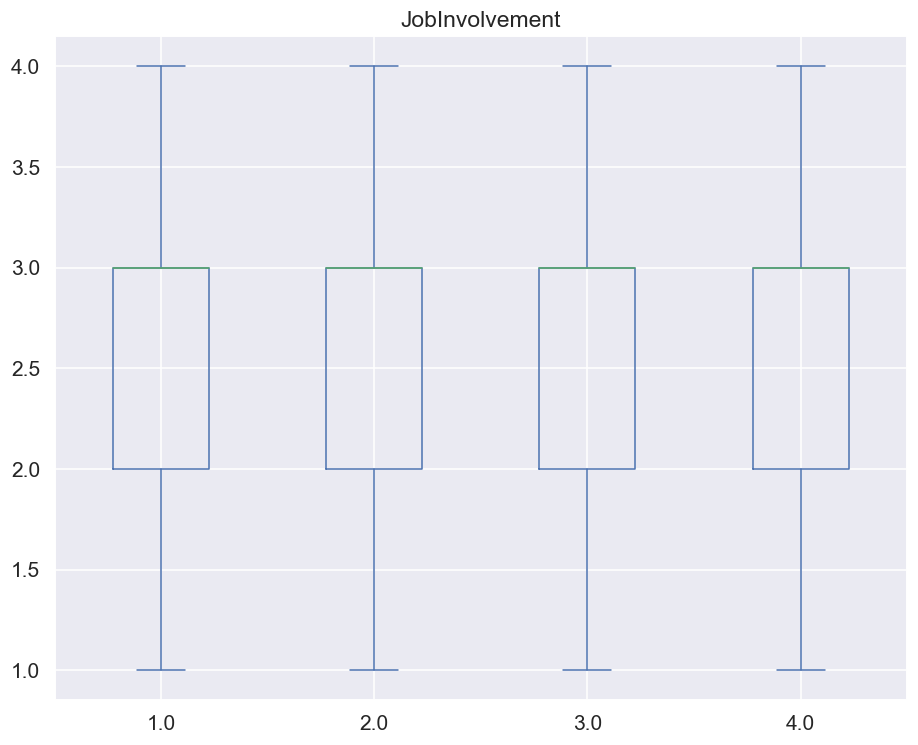

In [ ]:
df.plot.box(column="JobInvolvement", by="JobSatisfaction", figsize=(10, 8))

JobLevel    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

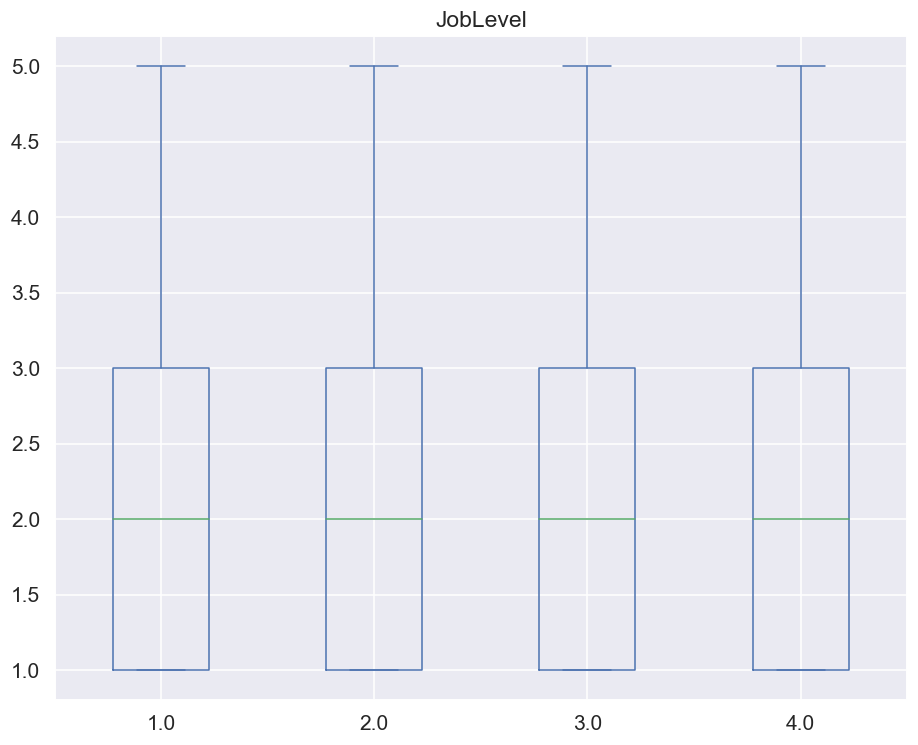

In [ ]:
df.plot.box(column="JobLevel", by="JobSatisfaction", figsize=(10, 8))

MonthlyIncome    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

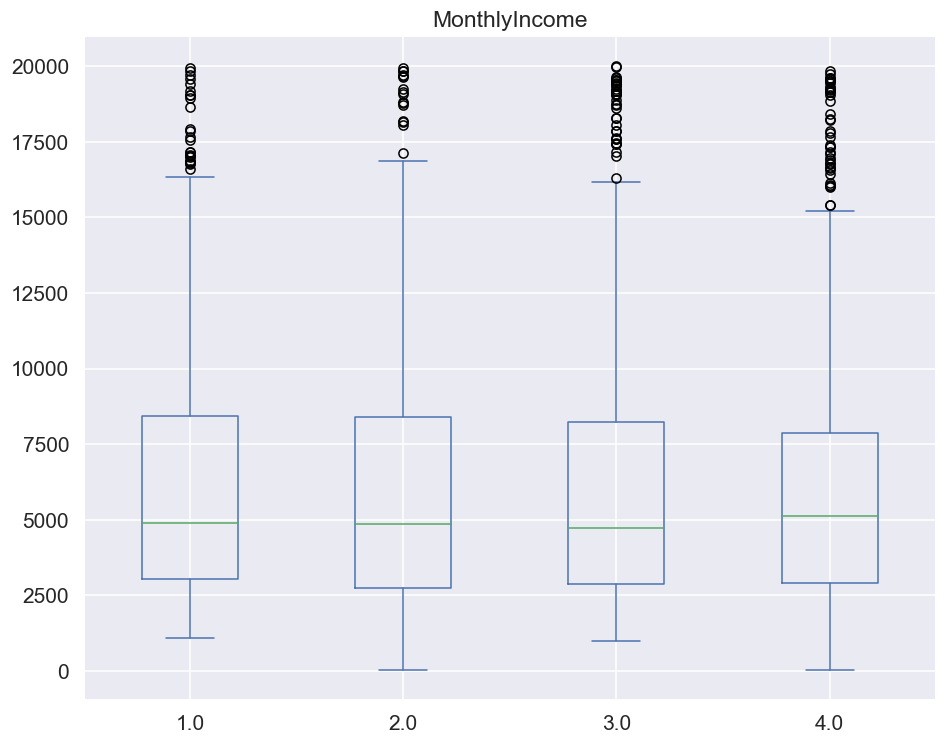

In [ ]:
df.plot.box(column="MonthlyIncome", by="JobSatisfaction", figsize=(10, 8))

MonthlyRate    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

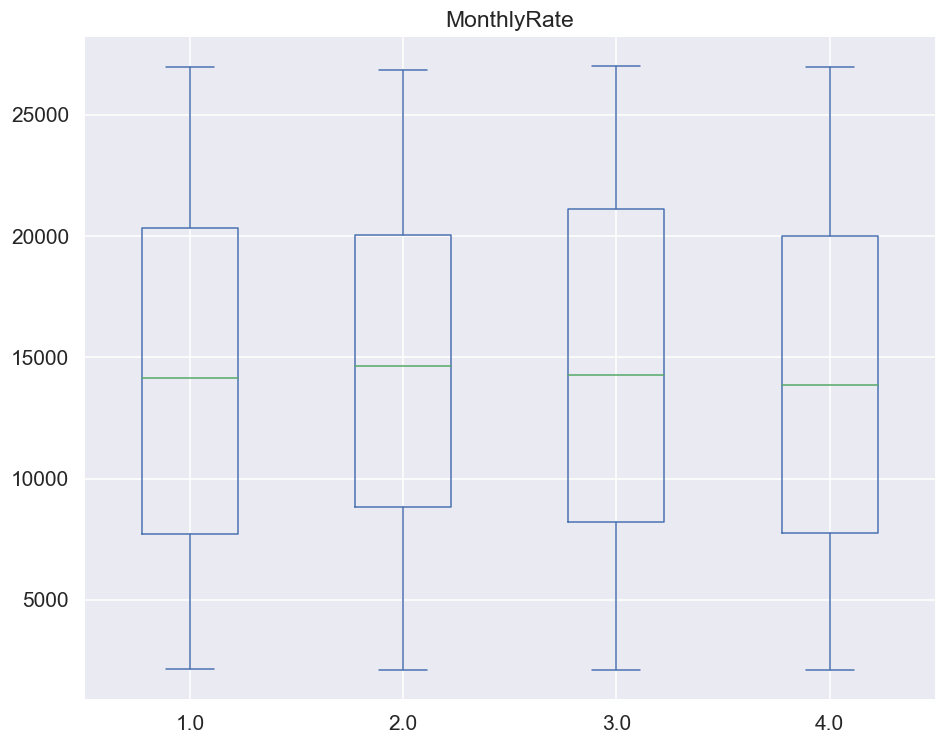

In [ ]:
df.plot.box(column="MonthlyRate", by="JobSatisfaction", figsize=(10, 8))

NumCompaniesWorked    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

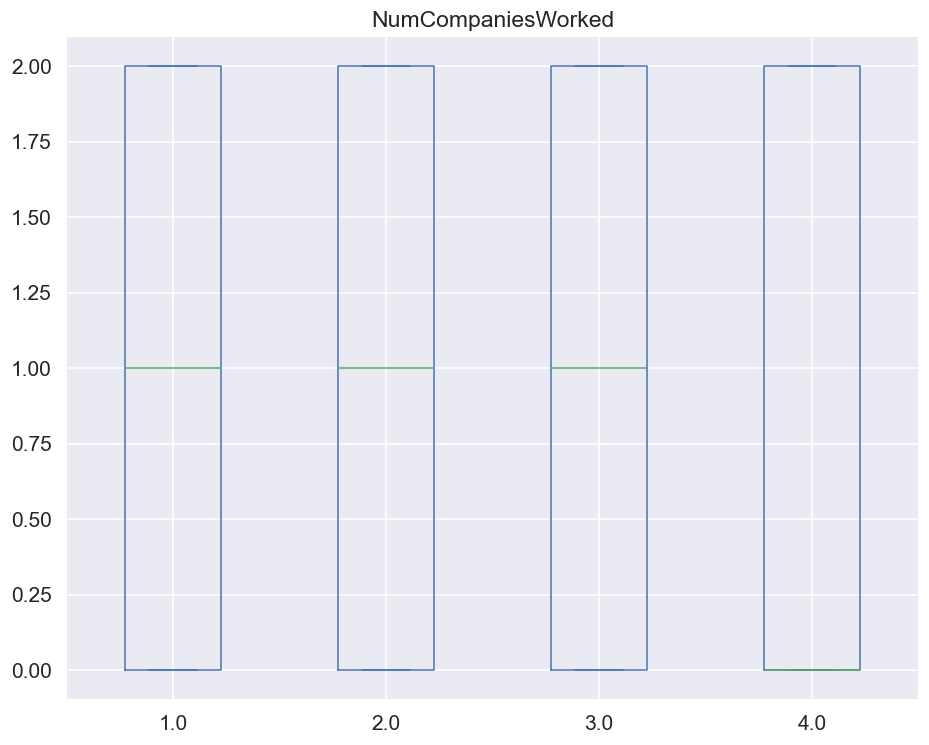

In [ ]:
df.plot.box(column="NumCompaniesWorked", by="JobSatisfaction", figsize=(10, 8))

PercentSalaryHike    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

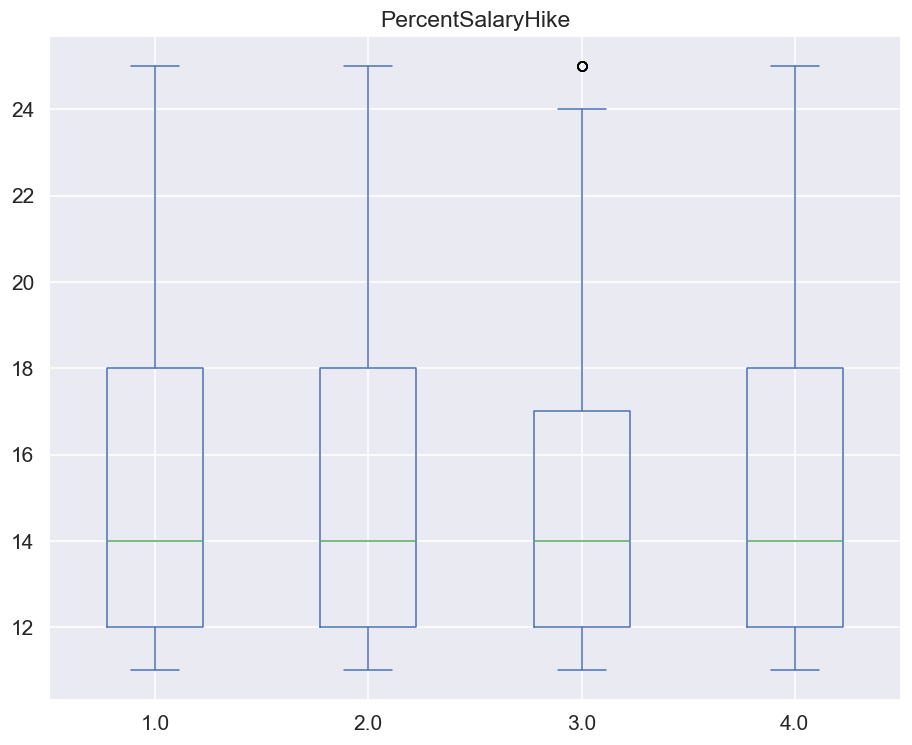

In [ ]:
df.plot.box(column="PercentSalaryHike", by="JobSatisfaction", figsize=(10, 8))

PerformanceRating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

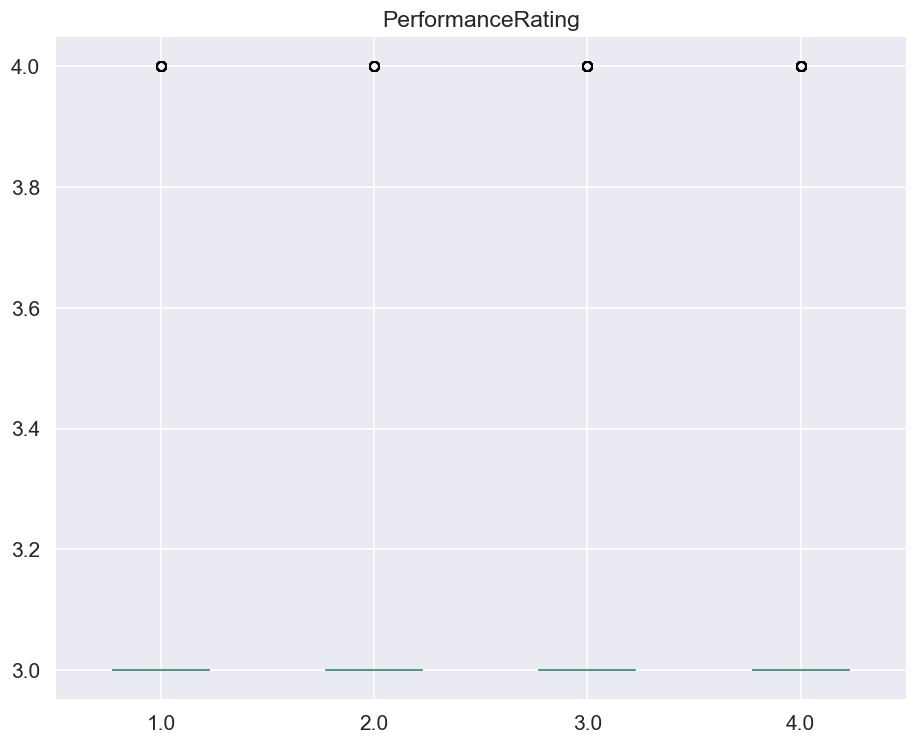

In [ ]:
df.plot.box(column="PerformanceRating", by="JobSatisfaction", figsize=(10, 8))

RelationshipSatisfaction    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

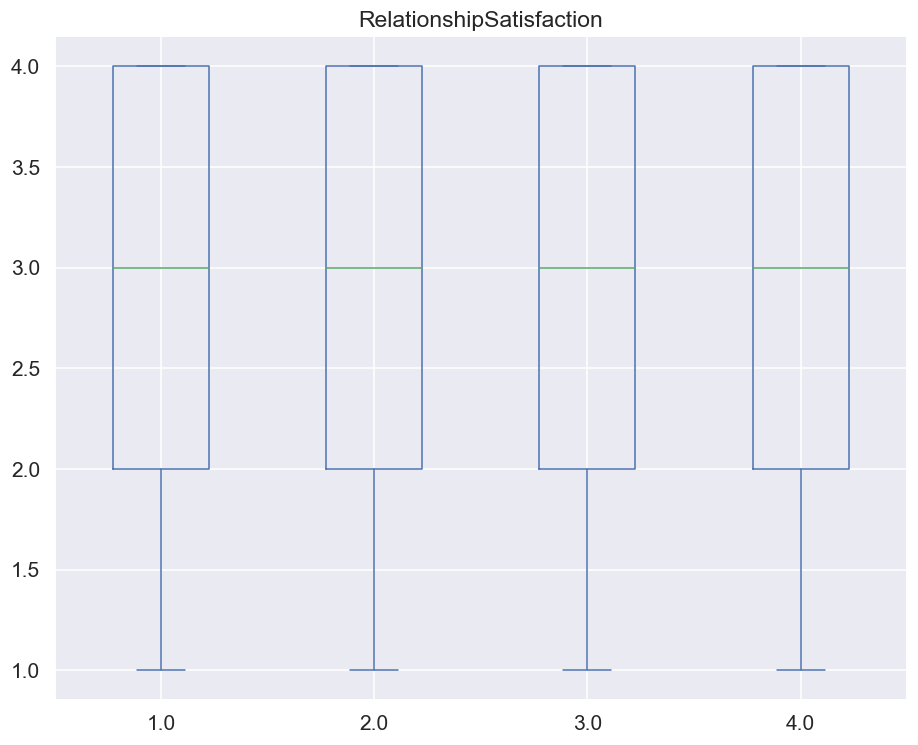

In [ ]:
df.plot.box(column="RelationshipSatisfaction", by="JobSatisfaction", figsize=(10, 8))

StockOptionLevel    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

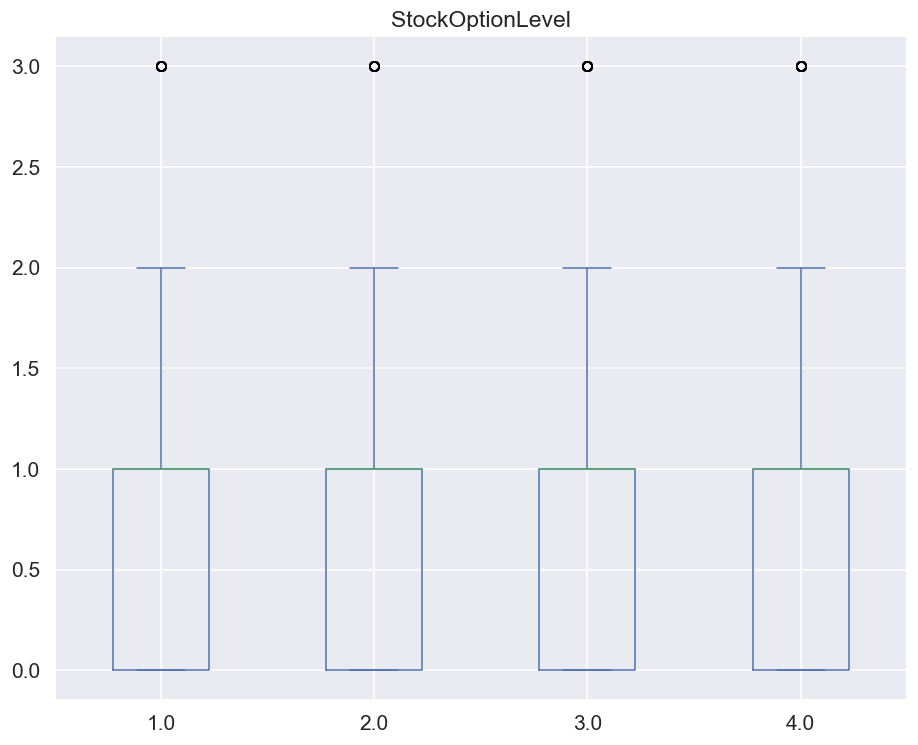

In [ ]:
df.plot.box(column="StockOptionLevel", by="JobSatisfaction", figsize=(10, 8))

TotalWorkingYears    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

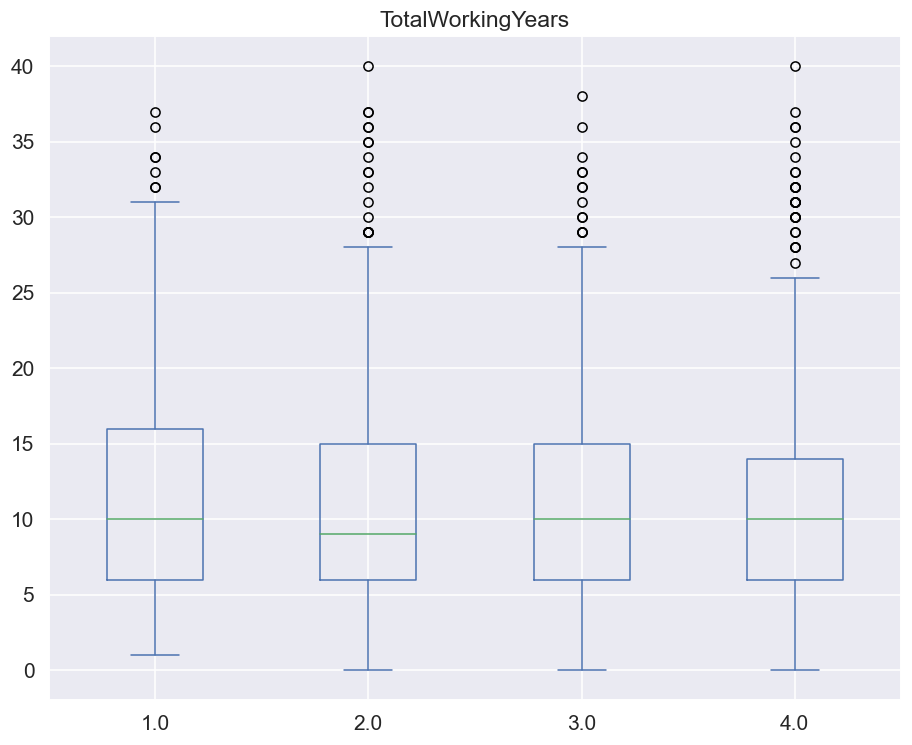

In [ ]:
df.plot.box(column="TotalWorkingYears", by="JobSatisfaction", figsize=(10, 8))

TrainingTimesLastYear    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

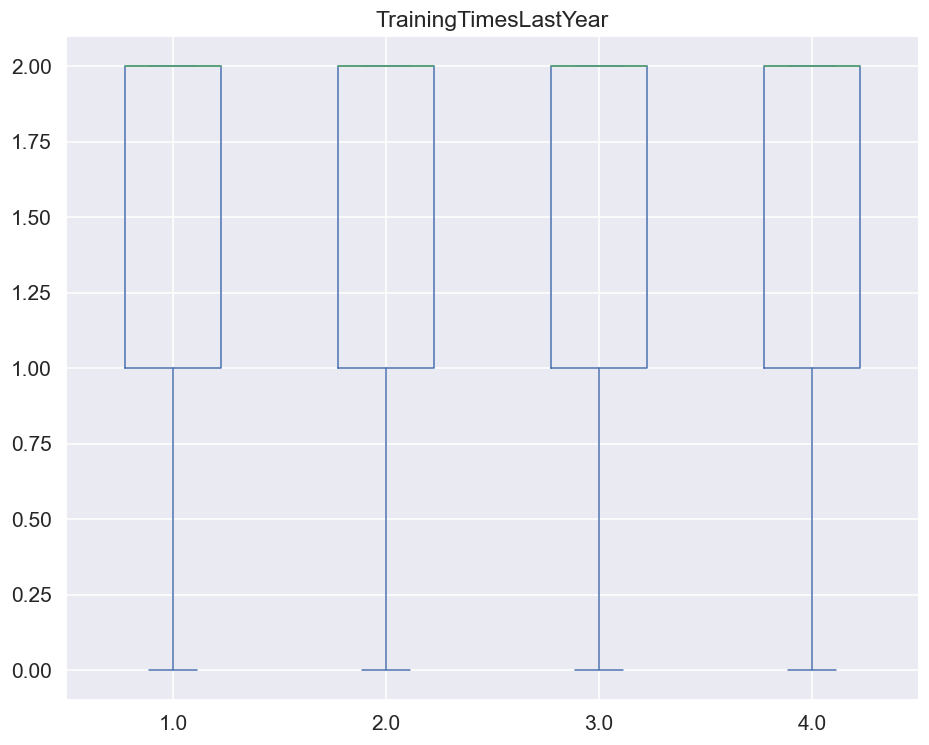

In [ ]:
df.plot.box(column="TrainingTimesLastYear", by="JobSatisfaction", figsize=(10, 8))

WorkLifeBalance    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

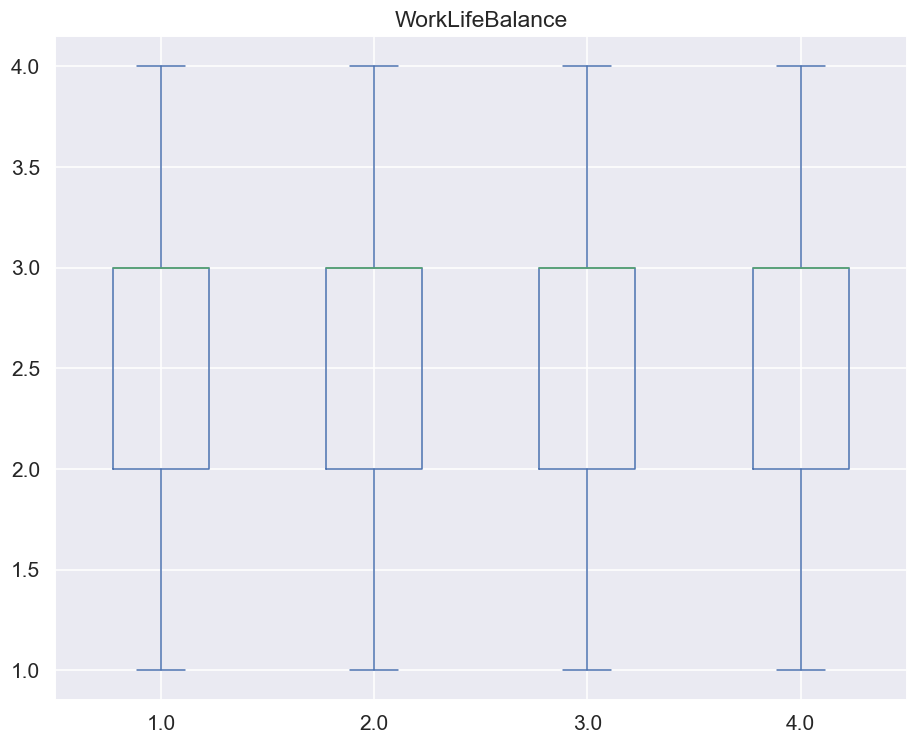

In [ ]:
df.plot.box(column="WorkLifeBalance", by="JobSatisfaction", figsize=(10, 8))

YearsAtCompany    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

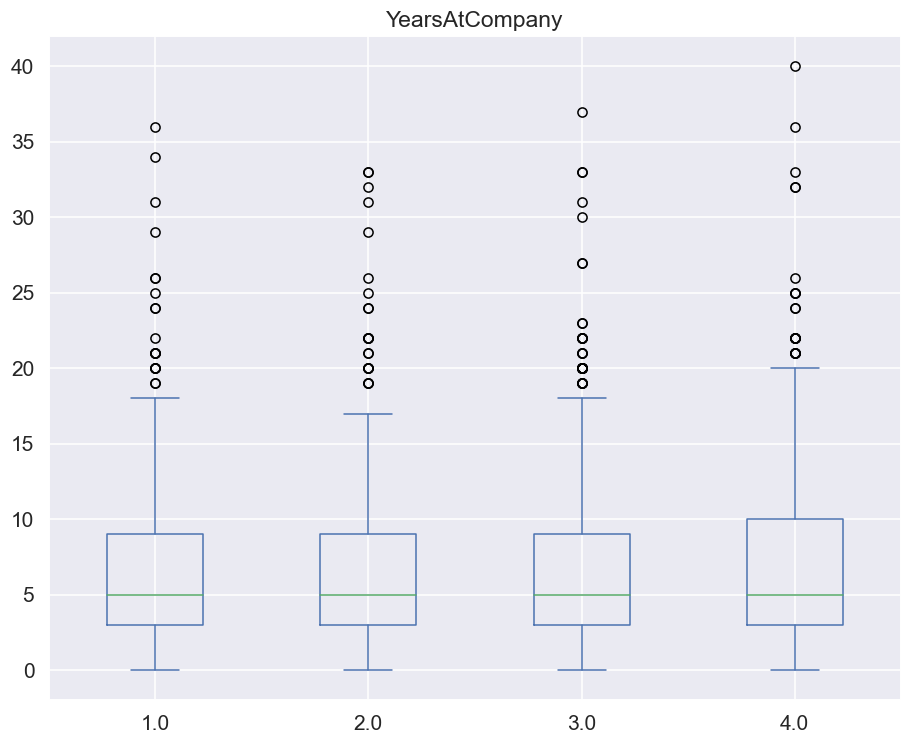

In [ ]:
df.plot.box(column="YearsAtCompany", by="JobSatisfaction", figsize=(10, 8))

YearsInCurrentRole    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

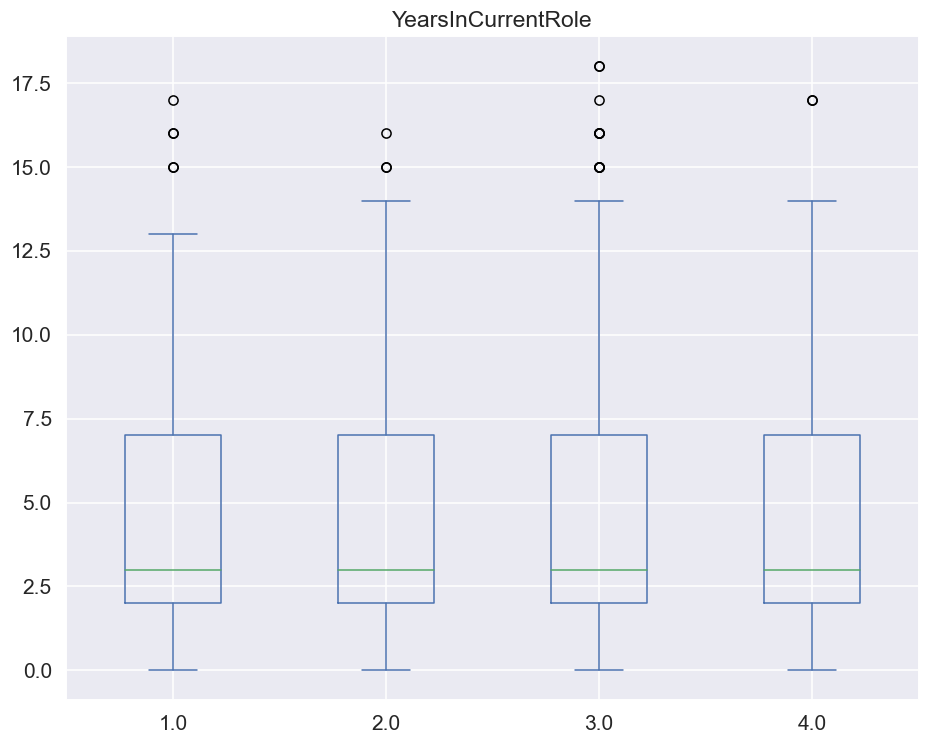

In [ ]:
df.plot.box(column="YearsInCurrentRole", by="JobSatisfaction", figsize=(10, 8))

YearsSinceLastPromotion    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

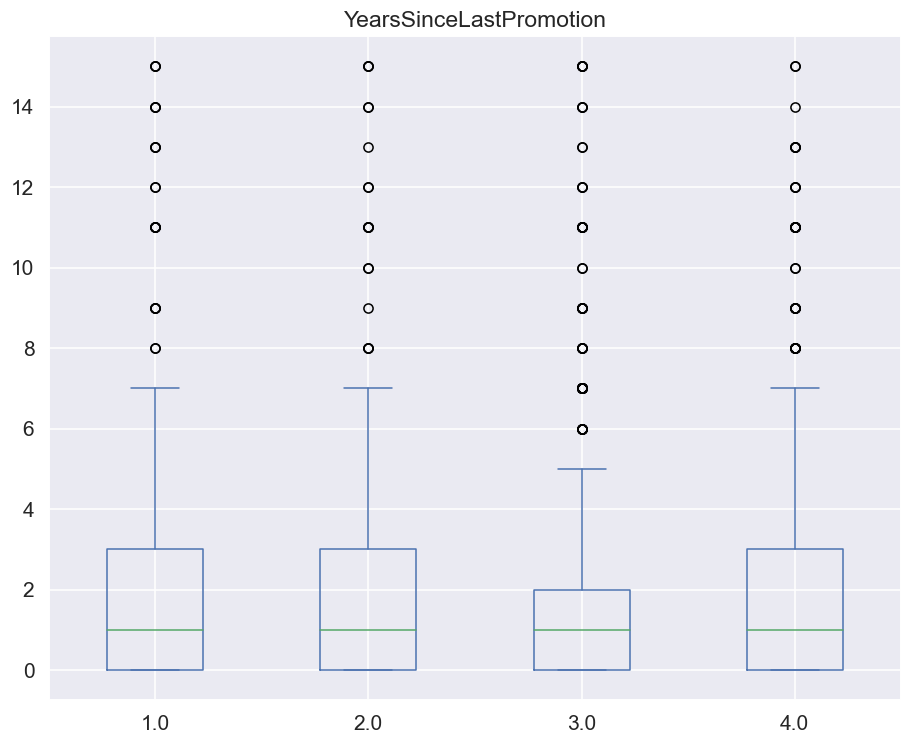

In [ ]:
df.plot.box(column="YearsSinceLastPromotion", by="JobSatisfaction", figsize=(10, 8))

YearsWithCurrManager    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

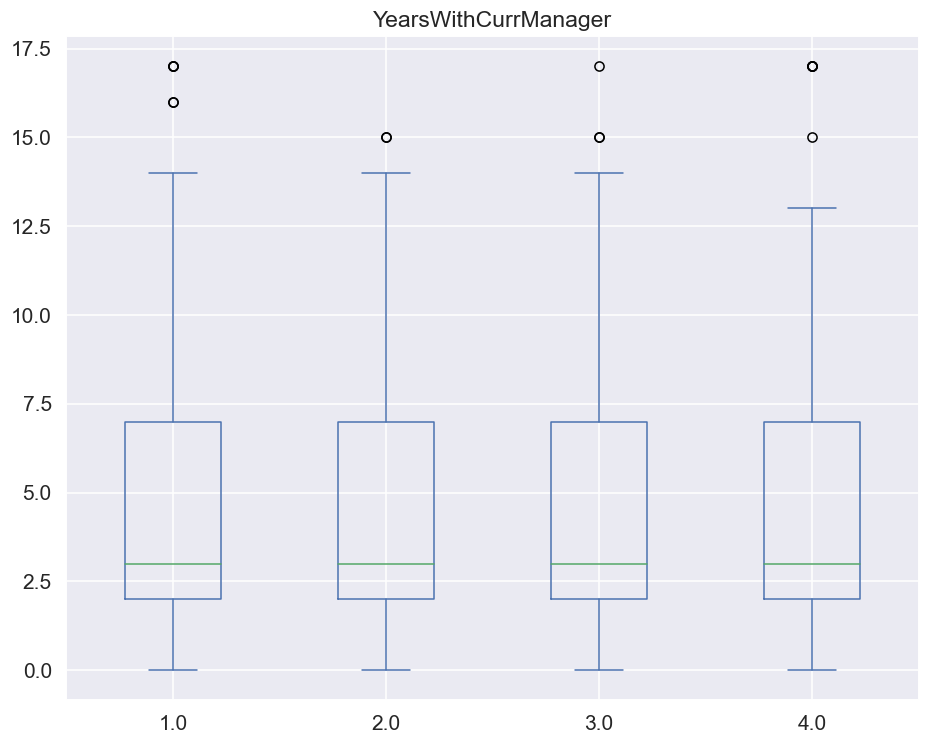

In [ ]:
df.plot.box(column="YearsWithCurrManager", by="JobSatisfaction", figsize=(10, 8))

No se ven valores muy altos (absolutos) respecto a la correlación entre la variable objetivo JobSatisfaction y las demás columnas, las más altas que se encontraron fueron: HourlyRate, NumCompaniesWorked y DailyRate                   

## d. Verificar la calidad de los datos

### i. Verificación de datos duplicados

In [ ]:
data.duplicated().sum()

0

No se encontraron datos duplicados.

### ii. Verificación de datos faltantes
Datos faltantes son aquellos que aparecen en blanco o cuyo valor asignado por el negocio quiere decir que no se tienen (por ejemplo: null, N/A, ?, entre otros). 

In [ ]:
data.isnull().sum()

JobSatisfaction             12
Age                          3
Attrition                    1
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                7
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

Se idenfican datos faltantes para las columnas: JobSatisfaction(12), Age(3), Attrition(1), y StandardHours (7).

#### Job Satisfaction

In [ ]:
#datos vacíos columna JobSatisfaction
data[data['JobSatisfaction'].isnull()]['NewEmployee']

15      1
69      1
129     1
265     1
604     1
739     1
844     1
887     1
907     1
990     1
1161    1
1374    1
Name: NewEmployee, dtype: int64

Se identificaron 12 registros vacíos para ésta columna, que coinciden con que la variable NewEmployee = 1, y que de acuerdo a la descripción del taller son los datos con los se desconoce su nivel de satisfacción y con el modelo a desarrollar se quiere se estimará el valor de JobSatisfaction para éstos registros.

#### Age

In [ ]:
#datos vacíos columna Age
data[data['Age'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0
977,3.0,NaN,No,Non-Travel,999,Research & Development,26,1,Technical Degree,1,...,80.0,3,5,2,3,5,4,0,0,0
1340,3.0,NaN,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,1,...,80.0,1,10,4,3,10,9,1,7,0


In [ ]:
print("mediana",data['Age'].median())
print("media",data['Age'].mean())

mediana 36.0
media 37.08649367930805


Se propone imputar los valores pendientes con la mediana (36.0)

#### Attrition

In [ ]:
#datos vacíos columna Attrition
data[data['Attrition'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
1337,2.0,28.0,NaN,Travel_Rarely,1172,Sales,3,3,Med,1,...,80.0,1,1,3,3,1,0,0,0,0


In [ ]:
data['Attrition'].describe()

count     1505
unique       3
top         No
freq      1254
Name: Attrition, dtype: object

Se observa que la moda para la columna Attrition es de “No” (83%). Se considera imputarlo con el valor de moda “No” (dado que es un solo registro no se espera se afecte considerablemente por esta decisión).

#### StandardHours

In [ ]:
#datos vacíos columna StandardHours 
data[data['StandardHours'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
396,3.0,43.0,No,Travel_Rarely,1473,Research & Development,8,4,Other,1,...,NaN,0,8,3,3,5,2,0,2,0
491,3.0,43.0,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,...,NaN,1,10,3,3,8,7,4,7,0
532,1.0,47.0,No,Travel_Rarely,703,Sales,14,4,Marketing,1,...,NaN,0,20,2,3,7,7,1,7,0
992,3.0,39.0,No,Non-Travel,1485,Research & Development,25,2,Life Sciences,1,...,NaN,1,13,2,3,6,4,0,5,0
1112,2.0,38.0,Yes,Travel_Rarely,903,Research & Development,2,3,Med,1,...,NaN,2,7,2,3,5,2,1,4,0
1291,1.0,37.0,Yes,Travel_Rarely,370,Research & Development,10,4,Med,1,...,NaN,0,10,4,1,10,3,0,8,0
1377,4.0,49.0,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,...,NaN,0,28,3,3,5,4,4,3,0


In [ ]:
#datos vacíos columna StandardHours 
data[data['StandardHours'].isnull()]

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
396,3.0,43.0,No,Travel_Rarely,1473,Research & Development,8,4,Other,1,...,NaN,0,8,3,3,5,2,0,2,0
491,3.0,43.0,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,...,NaN,1,10,3,3,8,7,4,7,0
532,1.0,47.0,No,Travel_Rarely,703,Sales,14,4,Marketing,1,...,NaN,0,20,2,3,7,7,1,7,0
992,3.0,39.0,No,Non-Travel,1485,Research & Development,25,2,Life Sciences,1,...,NaN,1,13,2,3,6,4,0,5,0
1112,2.0,38.0,Yes,Travel_Rarely,903,Research & Development,2,3,Med,1,...,NaN,2,7,2,3,5,2,1,4,0
1291,1.0,37.0,Yes,Travel_Rarely,370,Research & Development,10,4,Med,1,...,NaN,0,10,4,1,10,3,0,8,0
1377,4.0,49.0,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,...,NaN,0,28,3,3,5,4,4,3,0


In [ ]:
data["StandardHours"].describe()

count    1499.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

Esta columna presenta valor constante en 80, se considera que por se un valro constante de la columna lo mejor es no tenerla en ceunta para el modelo.

### iii. Verificación de datos atípicos

De acuerdo a la análisis de los datos, en resumen se tienen las siguientes variables con valores atípicos:

|Nombre Variable|Descripción propuesta solución|
|---|---|
|Age| Interpretar los valores atípicos como un problema de digitación, por lo cual 3 se reemplaza con 30, 190 por 19 y 200 por 20.|
|HourlyRate| Interpretar los valores atípicos como un problema de digitación, por lo cual 150 se reemplaza con 50, 169 por 69, 179 por 79, 186 por 86 y 190 por 90.|
|MonthlyIncome| Se interpreta el valor atípico como un problema de digitación, por lo cual se reemplazará 9907000 por 9907.|
|YearsAtCompany| Se interpreta el valor atípico como un problema de digitación, por lo cual se reemplazará 100 por 10.|

### iv. Verificación de datos inconsistentes
De acuerdo a la análisis de los datos, en resumen se tienen las siguientes variables con datos incosistentes en las variables categóricas:

|Nombre Variable|Descripción propuesta solución|
|---|---|
|Attrition|	Se interpreta error de digitación y se propone cambiar el Na por No.|
|Gender|	Categorías: Fem, man, female, son errores de digitación y solo debería tener Male o Female.|
|MaritalStatus|	 las categorías S, D, M, corresponden a Single, Divorced y Married respectivamente, por lo cual se propone renombrarlas correctamente.|
|OverTime|	la otra categoría Na, es un error de digitación de No.|


### v. Datos constantes o únicos
De acuerdo a la análisis de los datos, en resumen se tienen las siguientes variables con datos constantes o únicos para cada registro:

|Nombre Variable|Descripción|
|---|---|
|EmployeeNumber| identificador único por empleado, quitar columna|
|EmployeeCount|	Valores constantes, quitar columna|
|StandardHours|	Valores constantes, quitar columna|
|Over18	Valores| constantes, quitar columna|

### vi. Porpuestas casos alta cardinalidad


|Nombre Variable|Descripción|
|---|---|
|JobRole|	Se observa que esta variable tiene una alta cardinalidad, por lo cual se propone agrupar algunos de sus roles. Por ejemplo RH corresponde a Human Resources.|
|Education|	Se observa que la mayoría de los empleados tienen un nivel de educación de 3, seguido de 4 y 2. Se propone agrupar los niveles 5 y 7 en una categoría "5".|
|NumCompaniesWorked|	Se propone agrupar los datos en 3 grupos: 0, 1 y 2 o más.|
|TrainingTimesLastYear|	Se propone agrupar los datos en 3 grupos: 0, 1 y 2, 3 o más.|

### vii. Reporte de Entendimiento de los datos

Aquí se cierra esta etapa al consolidar lo hecho en un reporte detallado incluyendo todo lo que se encontró hasta el momento en los datos a manejar en el proyecto. 

## d. Preparación de datos

### i. Transformación de datos

A continuación se realiza los ajustes de datos indicados en la sección anterior:

#### JobRole

Como se mencionó anteriormente, esta categoría tiene una alta cardinalidad, por lo cual se procede a agrupar los siguientes roles:
- sales executive + sales representative = sales
- research scientist + research director = research
- Human Resources + RH = HR
- Laboratory Technician + lab tech = Laboratory
- Manufacturing Director + manager = managers

In [ ]:
data["JobRole"] = data["JobRole"].replace("Sales Executive", "Sales")
data["JobRole"] = data["JobRole"].replace("Sales Representative", "Sales")

data["JobRole"] = data["JobRole"].replace("Research Scientist", "Research")
data["JobRole"] = data["JobRole"].replace("Research Director", "Research")

data["JobRole"] = data["JobRole"].replace("Human Resources", "HR")
data["JobRole"] = data["JobRole"].replace("RH", "HR")

data["JobRole"] = data["JobRole"].replace("Human Resources", "HR")
data["JobRole"] = data["JobRole"].replace("RH", "HR")

data["JobRole"] = data["JobRole"].replace("Laboratory Technician", "Laboratory")
data["JobRole"] = data["JobRole"].replace("Lab Tech", "Laboratory")

data["JobRole"] = data["JobRole"].replace("Manufacturing Director", "Management")
data["JobRole"] = data["JobRole"].replace("Manager", "Management")



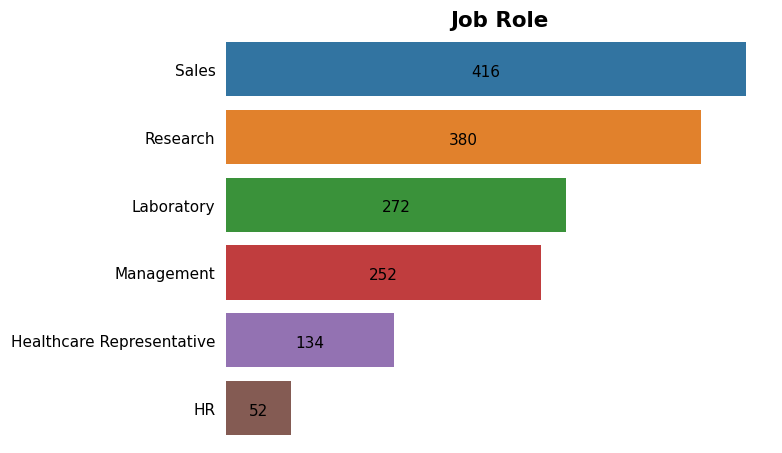

In [ ]:
plot_bars(data, 'JobRole', 'Job Role', orientation='h')

#### MaritalStatus

Se observa que las categorías S, D, M, corresponden a Single, Divorced y Married respectivamente, por lo que se procede a corregirlos.

In [ ]:
data["MaritalStatus"] = data["MaritalStatus"].replace("S", "Single")
data["MaritalStatus"] = data["MaritalStatus"].replace("D", "Married")
data["MaritalStatus"] = data["MaritalStatus"].replace("M", "Divorced")

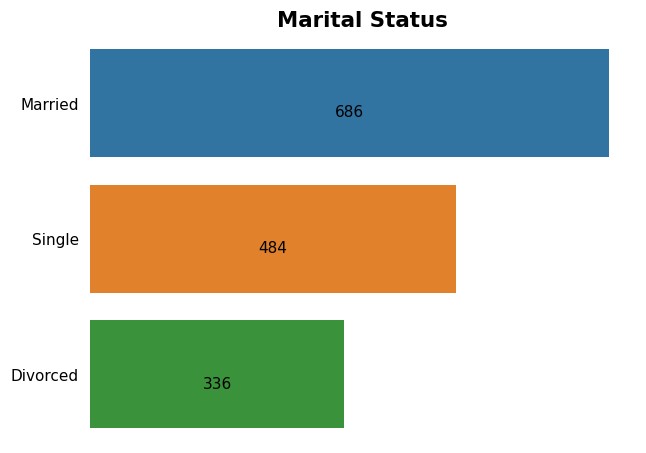

In [ ]:
plot_bars(data, 'MaritalStatus', 'Marital Status', orientation='h')

#### OverTime

In [ ]:
data["OverTime"] = data["OverTime"].replace("Na", "No")

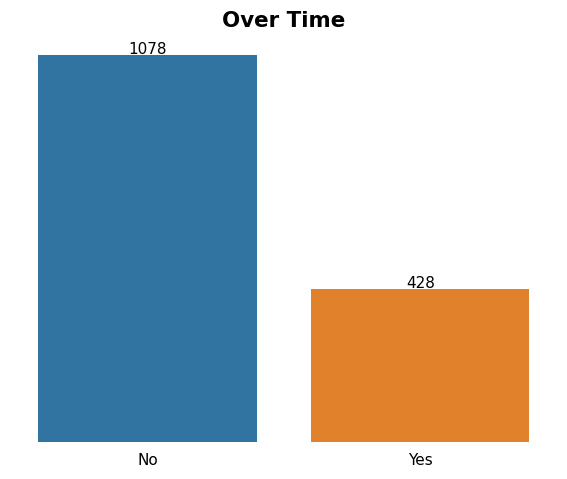

In [ ]:
plot_bars(data, 'OverTime', 'Over Time')

#### NumCompaniesWorked

Como se mencionó anteriormente, se propone agrupar los valores de esta variable en 3 categorías:
- 0: Si el empleado no ha trabajado en otras empresas o es su primer trabajo
- 1: Si el empleado ha trabajado en dos o tres empresas 
- 2: Si el empleado ha trabajado en cuatro o más empresas

In [ ]:
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].replace([0,1], 0)
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].replace([2,3], 1)
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].replace([4,5,6,7,8,9], 2)


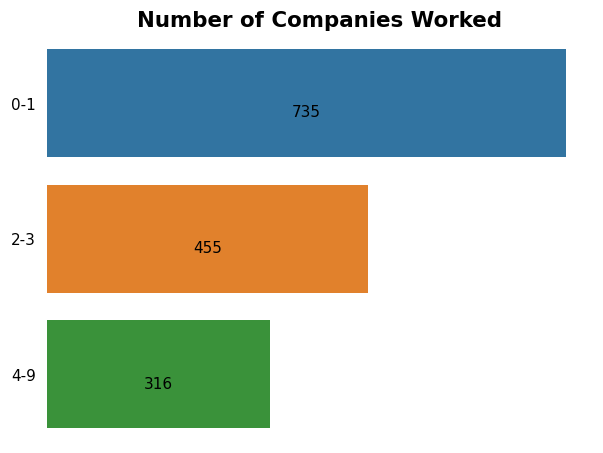

In [ ]:
plot_bars(data, 'NumCompaniesWorked', 'Number of Companies Worked', orientation='h', labels=['0-1', '2-3', '4-9'])

#### TrainingTimesLastYear

Como se mencionó anteriormente, se propone agrupar los valores de esta variable en 3 categorías:
- 0: Si el empleado no ha recibido capacitación en el último año
- 1: Si el empleado ha recibido capacitación una o dos veces en el último año
- 2: Si el empleado ha recibido capacitación tres o más veces en el último año

In [ ]:
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].replace([0,1], 0)
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].replace([1,2], 1)
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].replace([3,4,5,6], 2)

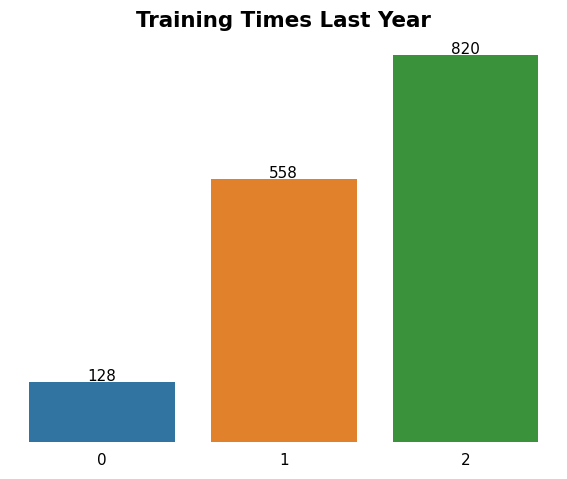

In [ ]:
plot_bars(data, 'TrainingTimesLastYear', 'Training Times Last Year', order=None)

#### Education

Se agruparán las últimas dos columnas de la columna Education 

In [ ]:
data['Education'] = data['Education'].replace(7, 5)

In [ ]:
# Drop column EmployeeCount
data = data.drop(['EmployeeCount'], axis=1)

# Drop column StandardHours
data = data.drop(['StandardHours'], axis=1)

# Drop column Over18
data = data.drop(['Over18'], axis=1)

# Drop column EmployeeNumber
data = data.drop(['EmployeeNumber'], axis=1)

In [ ]:
 #, EmployeeNumber, Over18, StandardHours

#### Gender

Se identifica que las categorías de género son Female y Male, y las demás categorías, Fem, man, female, son errores de digitación de estos dos géneros, por lo que se procede corregirlos.

In [ ]:
data["Gender"] = data["Gender"].replace("Fem", "Female")
data["Gender"] = data["Gender"].replace("female", "Female")
data["Gender"] = data["Gender"].replace("man", "Male")

plot_bars(data, 'Gender', 'Gender')

In [ ]:
fem=599/1506*100
mal=+907/1506*100

fem = round(fem, 1)
mal = round(mal, 1)

print("Porcentaje de mujeres: ", fem, "%")
print("Porcentaje de hombres: ", mal, "%")

diff = mal-fem

print("Diferencia entre hombres y mujeres: ", diff, "%")

In [ ]:
Las clases fueron corregidas y se observa que hay 20% más Homres que Mujeres en la empresa.

#### Attrition
Se infiere que los datos "Na" realmente corresponden a un "No". Para el valor nulo se procede a llenarlo con la moda.

In [ ]:
#imputar valor nulo de columna Attrition con moda
data['Attrition'] = data['Attrition'].fillna(pd.Series(data['Attrition'].values.flatten()).mode()[0])
#cambiar Na por No en Attrition
data['Attrition'] = data['Attrition'].apply(lambda x: "No" if (x=="Na") else x)

In [ ]:
#cambiar Na por No en Attrition
data['Attrition'] = data['Attrition'].apply(lambda x: "No" if (x=="Na") else x)

### ii. Selección de datos

### iii. Limpieza de datos

##### Corrección de valores atípicos

##### Age

*  Imputar los valores pendientes con la mediana (36.0)
*  Interpretar los valores atípicos como un problema de digitación, por lo cual 3 se reemplaza con 30, 190 por 19 y 200 por 20

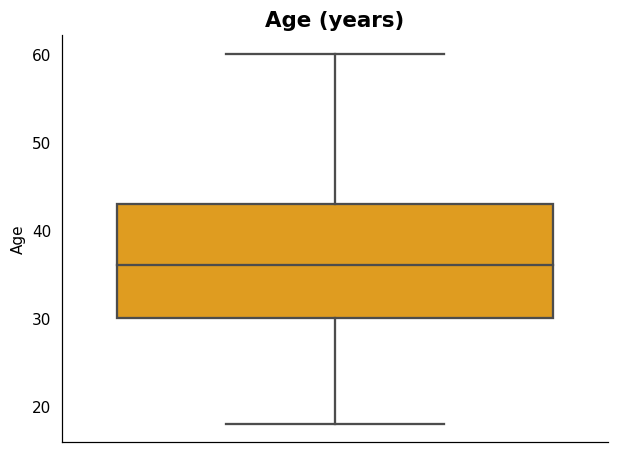

In [ ]:
data['Age'] = data['Age'].apply(lambda x: 30 if (x==3) else x)
data['Age'] = data['Age'].apply(lambda x: x/10 if (x>100) else x)

plot_box(data['Age'], 'Age', 'Age (years)')

#### HourlyRate

-   Interpretar los valores atípicos como un problema de digitación, por lo cual 140 se reemplaza con 40, 160 por 60 y 180 por 80

In [ ]:
# If data in HourlyRate is out of range, substract 100
data.loc[data['HourlyRate'] > 100, 'HourlyRate'] = data['HourlyRate'] - 100

#### MonthlyIncome

*   Se interpreta el valor atípico como un problema de digitación, por lo cual se reemplazará 9907000 por 9907.

In [ ]:
# if MonthlyIncome is out of range, divide by 1000
data.loc[data['MonthlyIncome'] > 20000, 'MonthlyIncome'] = data['MonthlyIncome'] / 1000
plot_box(data['MonthlyIncome'], 'MonthlyIncome', 'Monthly Income ($)')

#### YearsAtCompany

*   Se interpreta el valor atípico como un problema de digitación, por lo cual se reemplazará 100 por 10.



In [ ]:
data.loc[data['YearsAtCompany'] > 50, 'YearsAtCompany'] = data['YearsAtCompany'] / 10
plot_box(data['YearsAtCompany'], 'Years At Company','Years At Company Distribution')

### iv. Complementar datos

#### Job Satisfaction
Como se pudo evidenciar en la etapa de exploración de datos, la variable JobSatisfaction tiene valores faltantes, por lo que se procede a imputarlos con la moda de la variable.

In [ ]:
data['JobSatisfaction'] = data['JobSatisfaction'].fillna(pd.Series(data["JobSatisfaction"].values.flatten()).mode()[0])

# print the number of missing values in JobSatisfaction
sum(data['JobSatisfaction'].isnull())


0

### Attrition

In [ ]:
#imputar valor nulo de columna Attrition con moda
data['Attrition'] = data['Attrition'].fillna(pd.Series(data['Attrition'].values.flatten()).mode()[0])

# print the number of missing values in JobSatisfaction
sum(data['Attrition'].isnull())

0

#### Age

In [ ]:
#imputar datos fataltantes de Age con la mediana:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
data.isnull().sum()

JobSatisfaction             0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               7
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Análisis bivariado de las relaciones más importantes.

Primero se revisa la matriz de correlación de las columnas:

In [ ]:
#valores de correlación entre los datos
data.corr()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
JobSatisfaction,1.000000,-0.005410,0.033241,0.003172,-0.008310,-0.017663,-0.029479,-0.012278,-0.063965,-0.013650,...,NaN,0.001676,-0.019426,-0.029830,-0.021532,-0.003540,-0.003565,-0.017576,-0.024700,0.101413
Age,-0.005410,1.000000,0.011857,-0.011983,0.201124,-0.013817,-0.017696,0.009196,0.021597,0.026586,...,NaN,0.038814,0.678911,0.013750,-0.019200,0.314728,0.217701,0.217935,0.204402,0.011759
DailyRate,0.033241,0.011857,1.000000,-0.003234,-0.020554,0.016470,-0.042818,0.020272,0.027250,0.039691,...,NaN,0.043561,0.012592,-0.017794,-0.041068,-0.035999,0.011055,-0.032282,-0.031137,0.004610
DistanceFromHome,0.003172,-0.011983,-0.003234,1.000000,0.010938,-0.022914,0.038772,-0.014165,0.026279,0.005401,...,NaN,0.047167,-0.002332,-0.040841,-0.030884,0.004894,0.016900,0.008902,0.015389,0.037883
Education,-0.008310,0.201124,-0.020554,0.010938,1.000000,0.002109,0.029917,-0.022055,0.010658,0.033747,...,NaN,0.013140,0.151098,-0.017572,0.018616,0.073190,0.063929,0.053745,0.072214,0.021822
EmployeeCount,-0.017663,-0.013817,0.016470,-0.022914,0.002109,1.000000,-0.023806,0.006392,0.011476,0.009732,...,NaN,0.006358,-0.010676,0.021541,0.008807,0.004295,-0.030020,-0.017507,0.020840,-0.002310
EmployeeNumber,-0.029479,-0.017696,-0.042818,0.038772,0.029917,-0.023806,1.000000,0.028035,0.037783,-0.008774,...,NaN,0.052362,-0.026301,0.039171,0.004883,-0.018446,-0.016289,-0.018219,-0.013853,-0.017969
EnvironmentSatisfaction,-0.012278,0.009196,0.020272,-0.014165,-0.022055,0.006392,0.028035,1.000000,-0.051749,-0.003840,...,NaN,0.005281,-0.001568,0.021119,0.031582,0.000837,0.022633,0.015095,-0.004926,-0.025629
HourlyRate,-0.063965,0.021597,0.027250,0.026279,0.010658,0.011476,0.037783,-0.051749,1.000000,0.042138,...,NaN,0.054696,-0.008722,-0.005360,-0.010129,-0.024853,-0.029636,-0.027605,-0.026688,0.023737
JobInvolvement,-0.013650,0.026586,0.039691,0.005401,0.033747,0.009732,-0.008774,-0.003840,0.042138,1.000000,...,NaN,0.024357,-0.010003,-0.009336,-0.022748,-0.027031,0.008620,-0.025673,0.021522,0.002612


Respecto a los valores de las correlaciones en el caso de EmployeeCount y StandardHours no se tienen en cuenta, ya que como se vió anteriormente los valores son constantes, por lo cual se puede pensar en no usar éstas columnas para el modelo.

In [ ]:
#Revisar valores de correlación respecto a la variable objetivo JobSatisfaction:
pd.DataFrame(data=data.corr())['JobSatisfaction'].abs().sort_values(ascending=False)

JobSatisfaction             1.000000
NewEmployee                 0.101413
HourlyRate                  0.063965
NumCompaniesWorked          0.059531
DailyRate                   0.033241
TrainingTimesLastYear       0.029830
EmployeeNumber              0.029479
YearsWithCurrManager        0.024700
WorkLifeBalance             0.021532
TotalWorkingYears           0.019426
EmployeeCount               0.017663
YearsSinceLastPromotion     0.017576
JobInvolvement              0.013650
PercentSalaryHike           0.012874
EnvironmentSatisfaction     0.012278
MonthlyRate                 0.011491
Education                   0.008310
RelationshipSatisfaction    0.008027
PerformanceRating           0.007533
MonthlyIncome               0.005781
Age                         0.005410
YearsInCurrentRole          0.003565
YearsAtCompany              0.003540
DistanceFromHome            0.003172
StockOptionLevel            0.001676
JobLevel                    0.000214
StandardHours                    NaN
N

No se ven valores muy altos (absolutos) respecto a la correlación entre la variable objetivo JobSatisfaction y las demás columnas, las más altas que se encontraron fueron: HourlyRate, NumCompaniesWorked y DailyRate                   

## Selección de features

De la etapa de exploración de datos se pudo encontar columnas con valores constantes, por lo que se propone omitarlas:EmployeeCount, StandardHours y Over18.

También está el caso de la columna 'EmployeeNumber' la cual es un identificador único por empleado y por lo cual no tiene efecto sobre el modelo. Por lo cual también se omite esta columna.

In [ ]:
# Drop column EmployeeCount
data = data.drop(['EmployeeCount'], axis=1)

# Drop column StandardHours
data = data.drop(['StandardHours'], axis=1)

# Drop column Over18
data = data.drop(['Over18'], axis=1)

# Drop column EmployeeNumber
data = data.drop(['EmployeeNumber'], axis=1)

In [ ]:
data.isnull().sum()

JobSatisfaction             0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
NewEmployee                 0
dtype: int64

## Preguntas:

### ¿Qué variables impactan en mayor nivel la satisfacción de los empleados?

###¿Qué variables parecen no ser relevantes para el análisis?

#Modelamiento

##Transformación de columnas categóricas.

In [ ]:
data.head()

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,1,10,2,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,0,7,2,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,0,8,2,3,8,7,3,0,0
4,2.0,36.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,1,6,2,3,2,2,2,2,0


In [ ]:
# one hot enconding 
raw_data = data.copy()
data = pd.get_dummies(data, columns=["OverTime", "Attrition","Gender", "BusinessTravel","Department","EducationField","JobRole","MaritalStatus"], drop_first=True)

In [ ]:
print(data.shape)
data.columns.values

(1506, 44)


array(['JobSatisfaction', 'Age', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'NewEmployee', 'OverTime_Yes',
       'Attrition_Yes', 'Gender_Male', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Med', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Laboratory',
       'JobRole_Management', 'JobRole_

##Separación conjuntos datos entrenamiento, validación y prueba

Dado que solo se tienen 1494 registros, se separan los datos en 90% de entrenamiento y 10% para prueba.

In [ ]:
training_data, validacion = train_test_split(data, test_size=0.1, random_state=33)

Ahora separamos los datos de entrenamiento en entrenamiento y validación en un 80% y 20%

In [ ]:
train, test = train_test_split(training_data, test_size=0.2, random_state=33)

## Modelo 1:  Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

X = training_data.drop(['JobSatisfaction'], axis=1);
y = training_data['JobSatisfaction'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predictions = logreg.predict(X_test)

/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        47
         2.0       0.16      0.23      0.19        47
         3.0       0.34      0.77      0.47        90
         4.0       0.00      0.00      0.00        87

    accuracy                           0.30       271
   macro avg       0.13      0.25      0.17       271
weighted avg       0.14      0.30      0.19       271



/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo 2: DecisionTree

In [ ]:
#separando la variable objetivo:
x_train = train.drop('JobSatisfaction',axis=1)
y_train = train['JobSatisfaction']

#separando la variable objetivo:
x_test = test.drop('JobSatisfaction',axis=1)
y_test = test['JobSatisfaction']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1084, 43) (1084,) (271, 43) (271,)


In [ ]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory,JobRole_Management,JobRole_Research,JobRole_Sales,MaritalStatus_Married,MaritalStatus_Single
169,32.0,120,6,5,3,43,3,1,3038,12430,...,0,0,0,0,0,0,1,0,0,1
868,28.0,1179,19,4,4,78,2,1,3196,12449,...,1,0,0,0,1,0,0,0,1,0
1171,40.0,1329,7,3,1,73,3,1,2166,3339,...,0,0,0,0,1,0,0,0,0,1
8,38.0,216,23,3,4,44,2,3,9526,8787,...,0,0,0,0,0,1,0,0,0,1
594,29.0,1252,23,2,3,81,4,1,2700,23779,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,29.0,1413,1,1,2,42,3,3,7918,6599,...,1,0,0,0,0,0,0,1,1,0
721,50.0,939,24,3,4,95,3,4,13973,4161,...,0,0,0,0,0,1,0,0,1,0
1138,50.0,1234,20,5,2,41,3,4,11245,20689,...,0,0,0,1,0,0,0,0,1,0
175,56.0,713,8,3,3,67,3,1,4257,13939,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
print(y_train.unique(), y_test.unique() )

[3. 1. 4. 2.] [4. 3. 1. 2.]


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(max_depth = 12, criterion = 'entropy', random_state = 32)
model.fit(x_train, y_train)
#Predicciones de datos de entrenamiento
y_pred_train = model.predict(x_train)
#Predicciones de datos de test
y_pred_test = model.predict(x_test)

### Evaluación del modelo 2: 

Se realiza la evaluación con el conjunto de datos de entrenamiento y el de test:

In [ ]:

print("---------Reporte datos de test--------------")
print(classification_report(y_test, y_pred_test))

---------Reporte datos de test--------------
              precision    recall  f1-score   support

         1.0       0.34      0.16      0.22        64
         2.0       0.08      0.05      0.06        37
         3.0       0.31      0.45      0.37        86
         4.0       0.25      0.27      0.26        84

    accuracy                           0.27       271
   macro avg       0.25      0.23      0.23       271
weighted avg       0.27      0.27      0.26       271



Al comparar las evaluaciones de los datos de entrenamiento vs los de test, se observa que existe un sobrajuste muy alto (accuraccy pasa del 66% al 27%). Y la clase 2, es la que peor predice el modelo.

### Búsqueda de hiperparámetros de modelo 2:

In [ ]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 
              'max_depth' : range(6 , 15),
              'min_samples_leaf' : range(1, 5),
              'min_samples_split' : range(2, 5),
            }

tree_clas = DecisionTreeClassifier(random_state=32)

grid_search = GridSearchCV(estimator=tree_clas, param_grid=parameters, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
#Predicciones de datos de entrenamiento
y_pred_train_bp = grid_search.predict(x_train)
y_pred_test_bp = grid_search.predict(x_test)

print("---------Reporte datos de entrenamiento-----")
print(classification_report(y_train, y_pred_train_bp))
print("---------Reporte datos de test--------------")
print(classification_report(y_test, y_pred_test_bp))

---------Reporte datos de entrenamiento-----
              precision    recall  f1-score   support

         1.0       0.43      0.13      0.20       206
         2.0       0.85      0.05      0.10       209
         3.0       0.42      0.42      0.42       315
         4.0       0.40      0.78      0.53       354

    accuracy                           0.41      1084
   macro avg       0.52      0.35      0.31      1084
weighted avg       0.50      0.41      0.35      1084

---------Reporte datos de test--------------
              precision    recall  f1-score   support

         1.0       0.25      0.06      0.10        64
         2.0       0.00      0.00      0.00        37
         3.0       0.23      0.23      0.23        86
         4.0       0.25      0.49      0.33        84

    accuracy                           0.24       271
   macro avg       0.18      0.20      0.17       271
weighted avg       0.21      0.24      0.20       271



### Reducción de dimensionalidad usando PCA para el modelo 2:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)

#Transformación de las variables:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)


In [ ]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 
              'max_depth' : [2,4,6,8,10,12],
              'min_samples_leaf' : [1, 2]
            }

tree_clas = DecisionTreeClassifier(random_state=32)

grid_search = GridSearchCV(estimator=tree_clas, param_grid=parameters, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(x_train_pca, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=32),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2]},
             scoring='accuracy', verbose=1)

In [ ]:
#Predicciones de datos de entrenamiento
y_pred_train_bp_pca = grid_search.predict(x_train_pca)
y_pred_test_bp_pca = grid_search.predict(x_test_pca)


print("---------Reporte datos de test--------------")
print(classification_report(y_test, y_pred_test_bp_pca))

---------Reporte datos de test--------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        64
         2.0       0.50      0.03      0.05        37
         3.0       0.60      0.03      0.07        86
         4.0       0.31      0.96      0.47        84

    accuracy                           0.31       271
   macro avg       0.35      0.26      0.15       271
weighted avg       0.35      0.31      0.17       271



/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo 3: RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = training_data.drop(['JobSatisfaction'], axis=1)
Y = training_data['JobSatisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=33)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
y_pred = random_forest_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.33      0.09      0.15        64
         2.0       0.27      0.11      0.15        37
         3.0       0.35      0.42      0.38        86
         4.0       0.32      0.52      0.40        84

    accuracy                           0.33       271
   macro avg       0.32      0.29      0.27       271
weighted avg       0.33      0.33      0.30       271



## Modelo 4: XGBoost model

In [ ]:
from xgboost import XGBClassifier

X = training_data.drop(['JobSatisfaction'], axis=1);
y = training_data['JobSatisfaction'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)
predictionsXGB = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictionsXGB))

              precision    recall  f1-score   support

         1.0       0.44      0.06      0.11        64
         2.0       0.16      0.14      0.14        37
         3.0       0.31      0.49      0.38        86
         4.0       0.32      0.36      0.34        84

    accuracy                           0.30       271
   macro avg       0.31      0.26      0.24       271
weighted avg       0.32      0.30      0.27       271



## Modelo 5: Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB

#separando la variable objetivo:
x_train = train.drop('JobSatisfaction',axis=1)
y_train = train['JobSatisfaction']

#separando la variable objetivo:
x_test = test.drop('JobSatisfaction',axis=1)
y_test = test['JobSatisfaction']

modelNB = CategoricalNB()
modelNB.fit(x_train, y_train)
#Predicciones de datos de entrenamiento
y_pred_trainNB = modelNB.predict(x_train)
#Predicciones de datos de test
y_pred_testNB = modelNB.predict(x_test)

### Evaluación del modelo 5:

Se realiza la evaluación con el conjunto de datos de entrenamiento y el de test:

In [ ]:

print("---------Reporte datos de test--------------")
print(classification_report(y_test, y_pred_testNB))

---------Reporte datos de test--------------
              precision    recall  f1-score   support

         1.0       0.23      0.14      0.17        64
         2.0       0.08      0.08      0.08        37
         3.0       0.33      0.34      0.33        86
         4.0       0.30      0.38      0.34        84

    accuracy                           0.27       271
   macro avg       0.23      0.23      0.23       271
weighted avg       0.26      0.27      0.26       271



### Búsqueda de hiperparámetros del modelo 5:

In [ ]:
parameters = {'alpha': [0.5, 1.0, 1.2]
            }

NB = CategoricalNB()

grid_searchNB = GridSearchCV(estimator=NB, param_grid=parameters, scoring='accuracy', cv=3, n_jobs=-1)
grid_searchNB.fit(x_train, y_train)

grid_searchNB.best_params_

/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/naive_bayes.py", line 81, in predict
    jll = se

{'alpha': 0.5}

In [ ]:
#Predicciones de datos de entrenamiento
y_pred_train_bp = grid_searchNB.predict(x_train)
#Predicciones de datos de test
y_pred_test_bp = grid_searchNB.predict(x_test)

print("---------Reporte datos de entrenamiento-----")
print(classification_report(y_train, y_pred_train_bp))
print("---------Reporte datos de test--------------")
print(classification_report(y_test, y_pred_test_bp))

---------Reporte datos de entrenamiento-----
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       206
         2.0       1.00      0.98      0.99       209
         3.0       0.99      0.99      0.99       315
         4.0       0.99      1.00      0.99       354

    accuracy                           0.99      1084
   macro avg       0.99      0.99      0.99      1084
weighted avg       0.99      0.99      0.99      1084

---------Reporte datos de test--------------
              precision    recall  f1-score   support

         1.0       0.22      0.17      0.19        64
         2.0       0.08      0.08      0.08        37
         3.0       0.32      0.31      0.32        86
         4.0       0.31      0.36      0.33        84

    accuracy                           0.26       271
   macro avg       0.23      0.23      0.23       271
weighted avg       0.26      0.26      0.26       271



## Modelo 6: Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

#separando la variable objetivo:
x_train = train.drop('JobSatisfaction',axis=1)
y_train = train['JobSatisfaction']

#separando la variable objetivo:
x_test = test.drop('JobSatisfaction',axis=1)
y_test = test['JobSatisfaction']

neuralmodel = MLPClassifier(random_state=32)
neuralmodel.fit(x_train, y_train)
#Predicciones de datos de entrenamiento
y_pred_trainRN = neuralmodel.predict(x_train)
#Predicciones de datos de test
y_pred_testRN = neuralmodel.predict(x_test)

### Modelo 6: Evaluación

Se realiza la evaluación con el conjunto de datos de entrenamiento y el de test:

In [ ]:
print("---------Reporte datos de entrenamiento-----")
print(classification_report(y_train, y_pred_trainRN))
print("---------Reporte datos de test--------------")
print(classification_report(y_test, y_pred_testRN))

---------Reporte datos de entrenamiento-----
              precision    recall  f1-score   support

         1.0       0.19      0.05      0.08       206
         2.0       0.38      0.06      0.10       209
         3.0       0.37      0.07      0.12       315
         4.0       0.34      0.89      0.49       354

    accuracy                           0.33      1084
   macro avg       0.32      0.27      0.20      1084
weighted avg       0.33      0.33      0.23      1084

---------Reporte datos de test--------------
              precision    recall  f1-score   support

         1.0       0.17      0.06      0.09        64
         2.0       0.14      0.03      0.05        37
         3.0       0.36      0.05      0.08        86
         4.0       0.30      0.81      0.43        84

    accuracy                           0.28       271
   macro avg       0.24      0.24      0.16       271
weighted avg       0.27      0.28      0.19       271



### Modelo 6: Búsqueda de hiperparámetros.

In [ ]:
parameters = {'hidden_layer_sizes': [2, 4, 8, 10, 16, 32],
              'alpha': [0.0001, 0.001, 0.01]
            }

RN =  MLPClassifier(activation="relu", solver="adam", random_state=32)

grid_searchRN = GridSearchCV(estimator=RN, param_grid=parameters, scoring='accuracy', cv=3, n_jobs=-1)
grid_searchRN.fit(x_train, y_train)

grid_searchRN.best_params_

/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davidpolme/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davidpolme/.local/lib/python3.

{'alpha': 0.0001, 'hidden_layer_sizes': 2}

In [ ]:
#Predicciones de datos de entrenamiento
y_pred_train_bp = grid_searchNB.predict(x_train)
#Predicciones de datos de test
y_pred_test_bp = grid_searchNB.predict(x_test)

print("---------Reporte datos de entrenamiento-----")
print(classification_report(y_train, y_pred_train_bp))
print("---------Reporte datos de test--------------")
print(classification_report(y_test, y_pred_test_bp))

---------Reporte datos de entrenamiento-----
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       206
         2.0       1.00      0.98      0.99       209
         3.0       0.99      0.99      0.99       315
         4.0       0.99      1.00      0.99       354

    accuracy                           0.99      1084
   macro avg       0.99      0.99      0.99      1084
weighted avg       0.99      0.99      0.99      1084

---------Reporte datos de test--------------
              precision    recall  f1-score   support

         1.0       0.22      0.17      0.19        64
         2.0       0.08      0.08      0.08        37
         3.0       0.32      0.31      0.32        86
         4.0       0.31      0.36      0.33        84

    accuracy                           0.26       271
   macro avg       0.23      0.23      0.23       271
weighted avg       0.26      0.26      0.26       271



# Escalamiento de los datos

In [ ]:

## Escalamiento

# min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data.drop('JobSatisfaction',axis=1))
scaled_features = scaler.transform(data.drop('JobSatisfaction',axis=1))
data_scaled= pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_scaled.head()

data_scaled['JobSatisfaction'] = data['JobSatisfaction']
data_scaled.head()



,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,EducationField_Med,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory,JobRole_Management,JobRole_Research,JobRole_Sales,MaritalStatus_Married
0,4.0,0.715820,0.000000,0.166667,0.333333,0.914286,0.666667,0.25,0.298788,0.698053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.0,0.126700,0.250000,0.000000,0.666667,0.442857,0.333333,0.25,0.255582,0.916001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3.0,0.909807,0.035714,0.166667,1.000000,0.885714,0.333333,0.00,0.103384,0.012126,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.0,0.923407,0.071429,0.500000,1.000000,0.371429,0.666667,0.00,0.144388,0.845814,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,0.350036,0.035714,0.000000,0.000000,0.142857,0.666667,0.00,0.172374,0.583738,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Reduce dimensionality with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.drop('JobSatisfaction',axis=1))
X_pca = pca.transform(data.drop('JobSatisfaction',axis=1))
y_pca = data['JobSatisfaction']

## Random Forest (PCA)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=33)

random_forest_model_PCA = RandomForestClassifier()
random_forest_model_PCA.fit(X_train, Y_train)
y_pred_RF_PCA = random_forest_model_PCA.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_RF_PCA))

              precision    recall  f1-score   support

         1.0       0.18      0.12      0.15        56
         2.0       0.15      0.12      0.13        58
         3.0       0.35      0.32      0.34        94
         4.0       0.27      0.37      0.31        94

    accuracy                           0.26       302
   macro avg       0.24      0.23      0.23       302
weighted avg       0.26      0.26      0.25       302



In [ ]:
import pandas as pd
validaciones = pd.DataFrame()

validaciones['Modelo'] = ['Regresión Logística ','DecisionTree', 'DecisionTree (Hiperparámetros)','DecisionTree (PCA) ',
                          'RandomForest','Random Forest (PCA)','XGBoost model','Naive Bayes','Naive Bayes (Hiperparámetros)','Red Neuronal',' Red Neuronal (Hiperparámetros)']
validaciones['Accuracy'] = ['0.30','0.27','0.24','0.31','0.33','0.26','0.30','0.27','0.26','0.28','0.26']
validaciones['F1 Score'] = ['0.17','0.23','0.17','0.15','0.27','0.23','0.24','0.23','0.23','0.16','0.23']

validaciones

,Modelo,Accuracy,F1 Score
0,Regresión Logística,0.30,0.17
1,DecisionTree,0.27,0.23
2,DecisionTree (Hiperparámetros),0.24,0.17
3,DecisionTree (PCA),0.31,0.15
4,RandomForest,0.33,0.27
5,Random Forest (PCA),0.26,0.23
6,XGBoost model,0.30,0.24
7,Naive Bayes,0.27,0.23
8,Naive Bayes (Hiperparámetros),0.26,0.23
9,Red Neuronal,0.28,0.16
